# __Stroke probability prediction Challenge__

<div style="color:#00ADB5;
           display:fill;
           border-radius:10px;
           background-color:#393E46;
           font-size:30px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 5px; padding-left:20px;
              color:white;">
            <b>   1. Data Analysis</b>
        </p>
</div>

<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>1.1. Analyze target feature</b>
        </p>
</div>


In [39]:
#imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from colorama import Fore, Style
import matplotlib.colors as mpl_colors
from cycler import cycler
import umap.umap_ as umap_module
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [40]:
def hex_to_rgb(h):
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

palette = ['#0a84ff', '#ff9f0a', '#30d158', '#ff453a', '#bf5af2', '#5e5ce6', '#ff375f', '#64d2ff', '#ffd60a']
grey_palette = ['#8e8e93', '#636366', '#48484a', '#3a3a3c', '#2c2c2e', '#1c1c27']
white_color = '#d1d1d6'

palette_rgb = [hex_to_rgb(x) for x in palette]
cmap = mpl_colors.ListedColormap(palette_rgb)
colors = cmap.colors
bg_color= '#fdfcf6'

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'Large',
    'axes.labelsize': 'Large',
    'axes.prop_cycle': cycler('color',palette),
    'figure.facecolor': grey_palette[-2],
    'figure.edgecolor': grey_palette[-2],
    'axes.facecolor': grey_palette[-2],
    'text.color':white_color,
    'axes.labelcolor':white_color,
    'axes.edgecolor':white_color,
    'xtick.color':white_color,
    'ytick.color':white_color,
    'figure.dpi':150,
}

sns.set_theme(
    style='ticks',
    palette=sns.color_palette(palette),
    rc=custom_params
)

In [41]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train["stroke"].describe()

count    15304.000000
mean         0.041296
std          0.198981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: stroke, dtype: float64

In [42]:
train.head()

id  gender   age  hypertension  heart_disease ever_married work_type  \
0   0    Male  28.0             0              0          Yes   Private   
1   1    Male  33.0             0              0          Yes   Private   
2   2  Female  42.0             0              0          Yes   Private   
3   3    Male  56.0             0              0          Yes   Private   
4   4  Female  24.0             0              0           No   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban              79.53  31.1     never smoked       0  
1          Rural              78.44  23.9  formerly smoked       0  
2          Rural             103.00  40.3          Unknown       0  
3          Urban              64.87  28.8     never smoked       0  
4          Rural              73.36  28.8     never smoked       0

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [44]:
plt.figure(figsize=(10, 10))
print("stroke number : ", train["stroke"].value_counts()[0], "out of ", len(train)) 

stroke number :  14672 out of  15304


<Figure size 1500x1500 with 0 Axes>

<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>1.2. Univariate analysis</b>
        </p>
</div>


In [45]:
# concat train and test data
X = pd.concat([train.drop("stroke", axis=1), test], axis=0)
y = train["stroke"]
X.drop("id", axis=1, inplace=True)

# determine which data are numerical and which are categorical
numerical_features = X.select_dtypes(exclude=['object']).copy()
numerical_features = numerical_features.drop(["hypertension", "heart_disease"], axis=1)

categorical_features = X.select_dtypes(include=['object']).copy()
categorical_features["hypertension"] = X["hypertension"].astype("object")
categorical_features["heart_disease"] = X["heart_disease"].astype("object")

In [46]:
print(categorical_features)

       gender ever_married work_type Residence_type   smoking_status  \
0        Male          Yes   Private          Urban     never smoked   
1        Male          Yes   Private          Rural  formerly smoked   
2      Female          Yes   Private          Rural          Unknown   
3        Male          Yes   Private          Urban     never smoked   
4      Female           No   Private          Rural     never smoked   
...       ...          ...       ...            ...              ...   
10199  Female           No   Private          Urban     never smoked   
10200    Male          Yes   Private          Urban          Unknown   
10201  Female           No  children          Rural          Unknown   
10202    Male          Yes   Private          Urban     never smoked   
10203  Female           No  children          Urban          Unknown   

      hypertension heart_disease  
0                0             0  
1                0             0  
2                0            

In [47]:
print(numerical_features)

        age  avg_glucose_level   bmi
0      28.0              79.53  31.1
1      33.0              78.44  23.9
2      42.0             103.00  40.3
3      56.0              64.87  28.8
4      24.0              73.36  28.8
...     ...                ...   ...
10199  27.0              75.77  17.6
10200  49.0             102.91  26.7
10201   3.0             104.04  18.3
10202  31.0              82.41  28.7
10203   2.0              85.12  14.8

[25508 rows x 3 columns]


In [48]:
#this fixes a plot problem if value is int,float instead of object
categorical_features["hypertension"].replace({0: "No", 1: "Yes"}, inplace=True)
categorical_features["heart_disease"].replace({0: "No", 1: "Yes"}, inplace=True)
categorical_features.head()

C:\Users\ilias\AppData\Local\Temp\ipykernel_33732\2309966971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  categorical_features["hypertension"].replace({0: "No", 1: "Yes"}, inplace=True)
C:\Users\ilias\AppData\Local\Temp\ipykernel_33732\2309966971.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

gender ever_married work_type Residence_type   smoking_status hypertension  \
0    Male          Yes   Private          Urban     never smoked           No   
1    Male          Yes   Private          Rural  formerly smoked           No   
2  Female          Yes   Private          Rural          Unknown           No   
3    Male          Yes   Private          Urban     never smoked           No   
4  Female           No   Private          Rural     never smoked           No   

  heart_disease  
0            No  
1            No  
2            No  
3            No  
4            No

<a id="num_feat"></a>
#### [__1.2.1 Numerical Features__](#num_feat)

C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

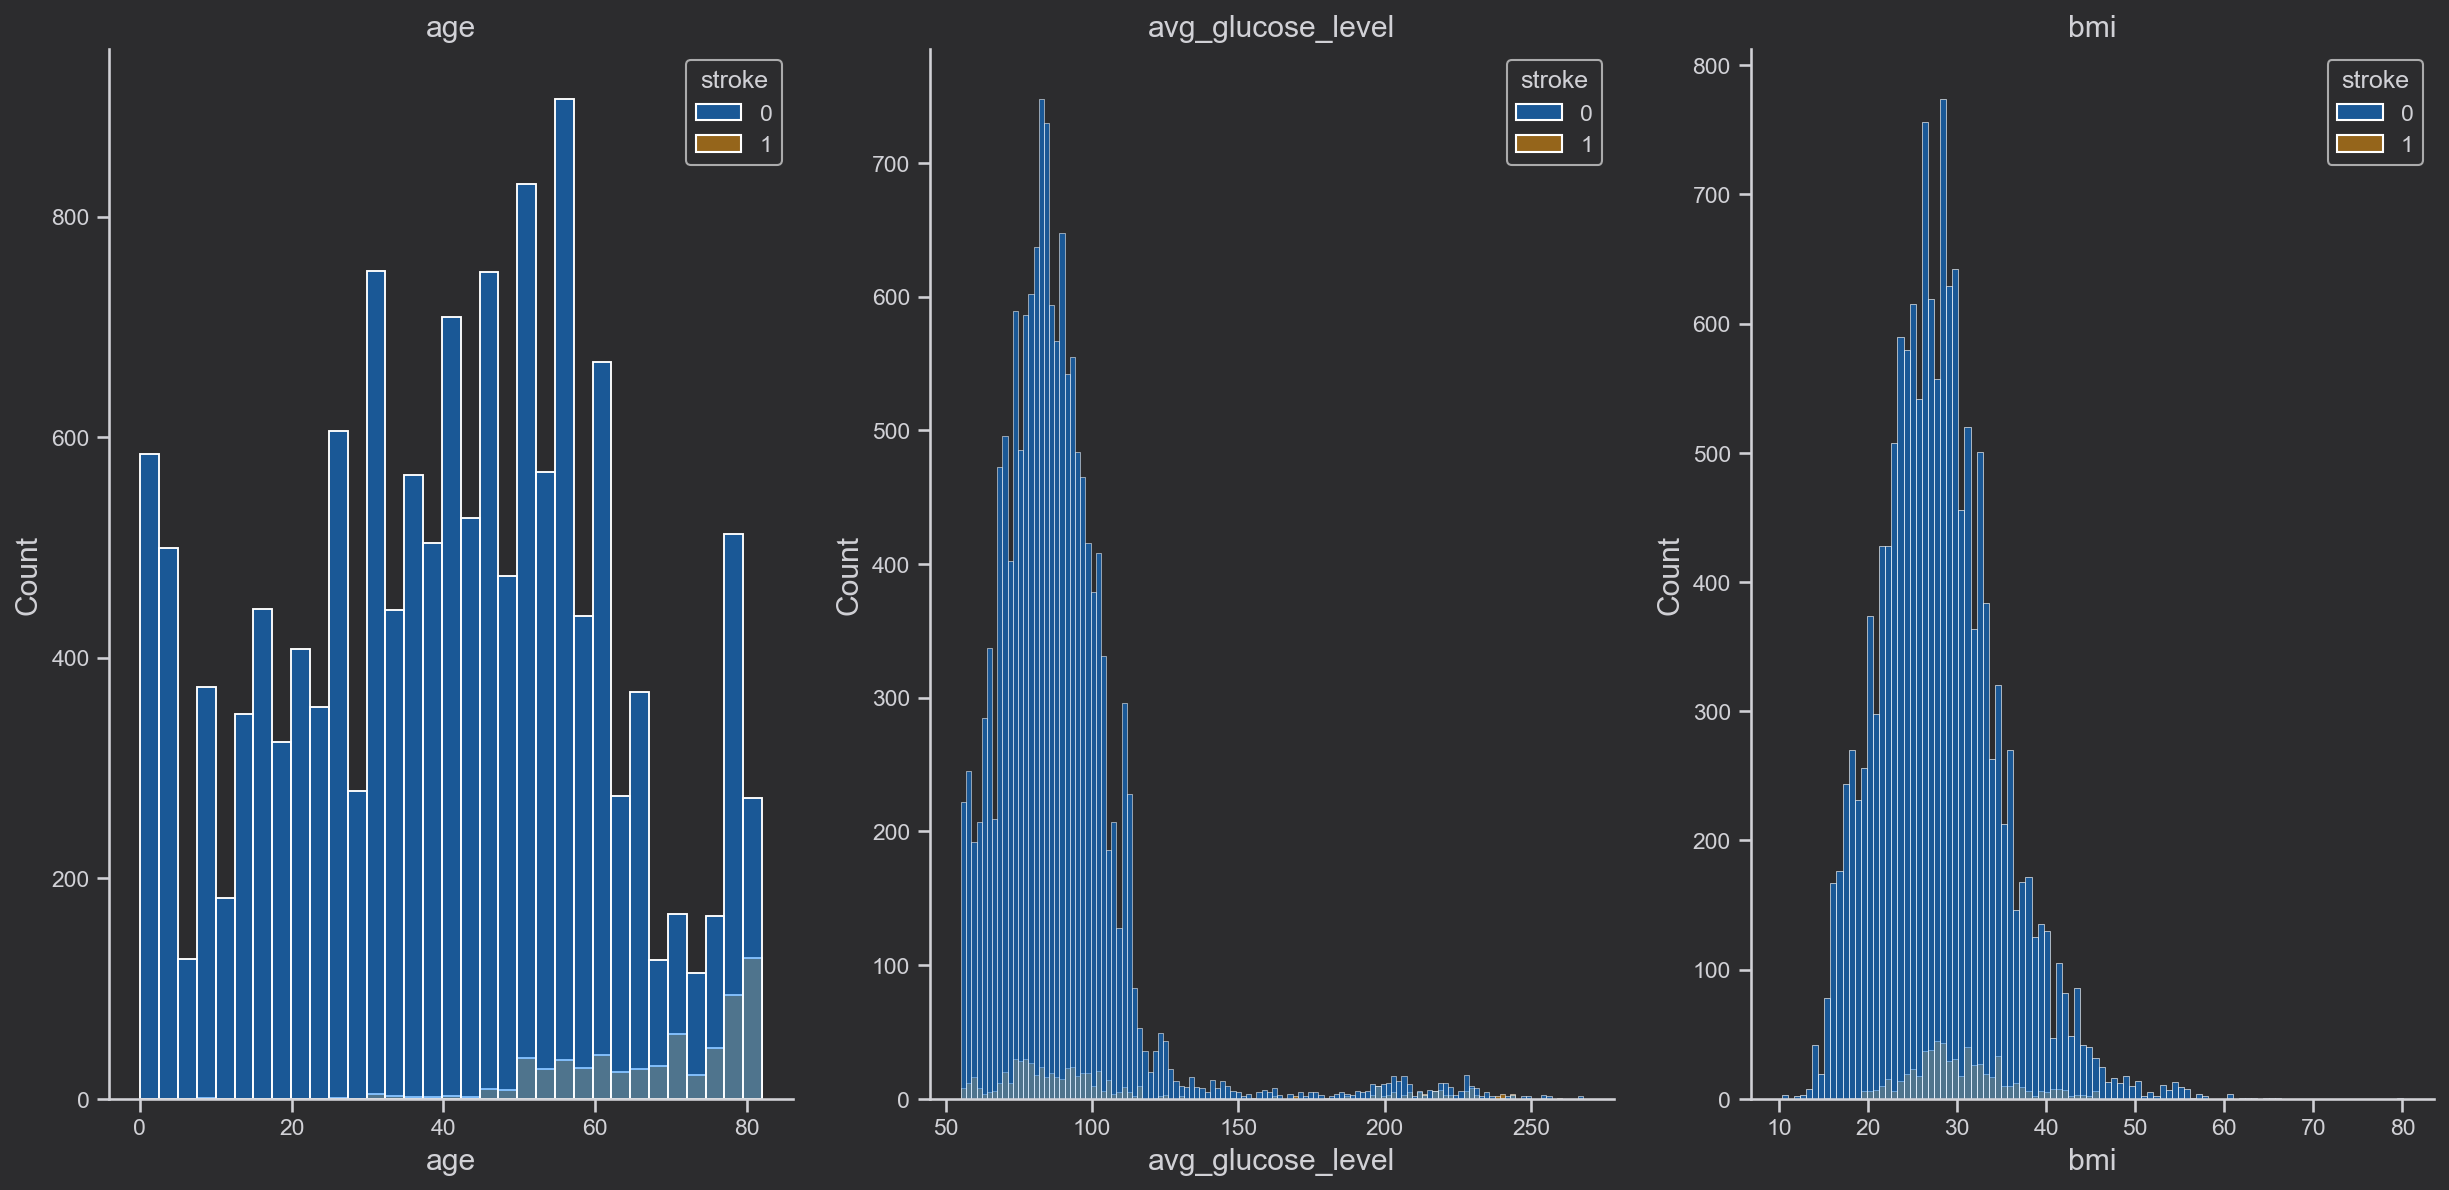

In [49]:
# plot numerical features
plt.figure(figsize=(20, 20))
col = len(numerical_features.columns)
rows = col // 3 + 1

for index, col in enumerate(numerical_features.columns):
    plt.subplot(rows, 3, index+1)
    sns.histplot(x = col, data = train, hue = "stroke", kde = False)
    plt.title(col)
plt.show()


<a id="num_feat"></a>
#### [__1.2.1 Numerical Features plot test__](#num_feat)

0 age


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1 avg_glucose_level


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2 bmi


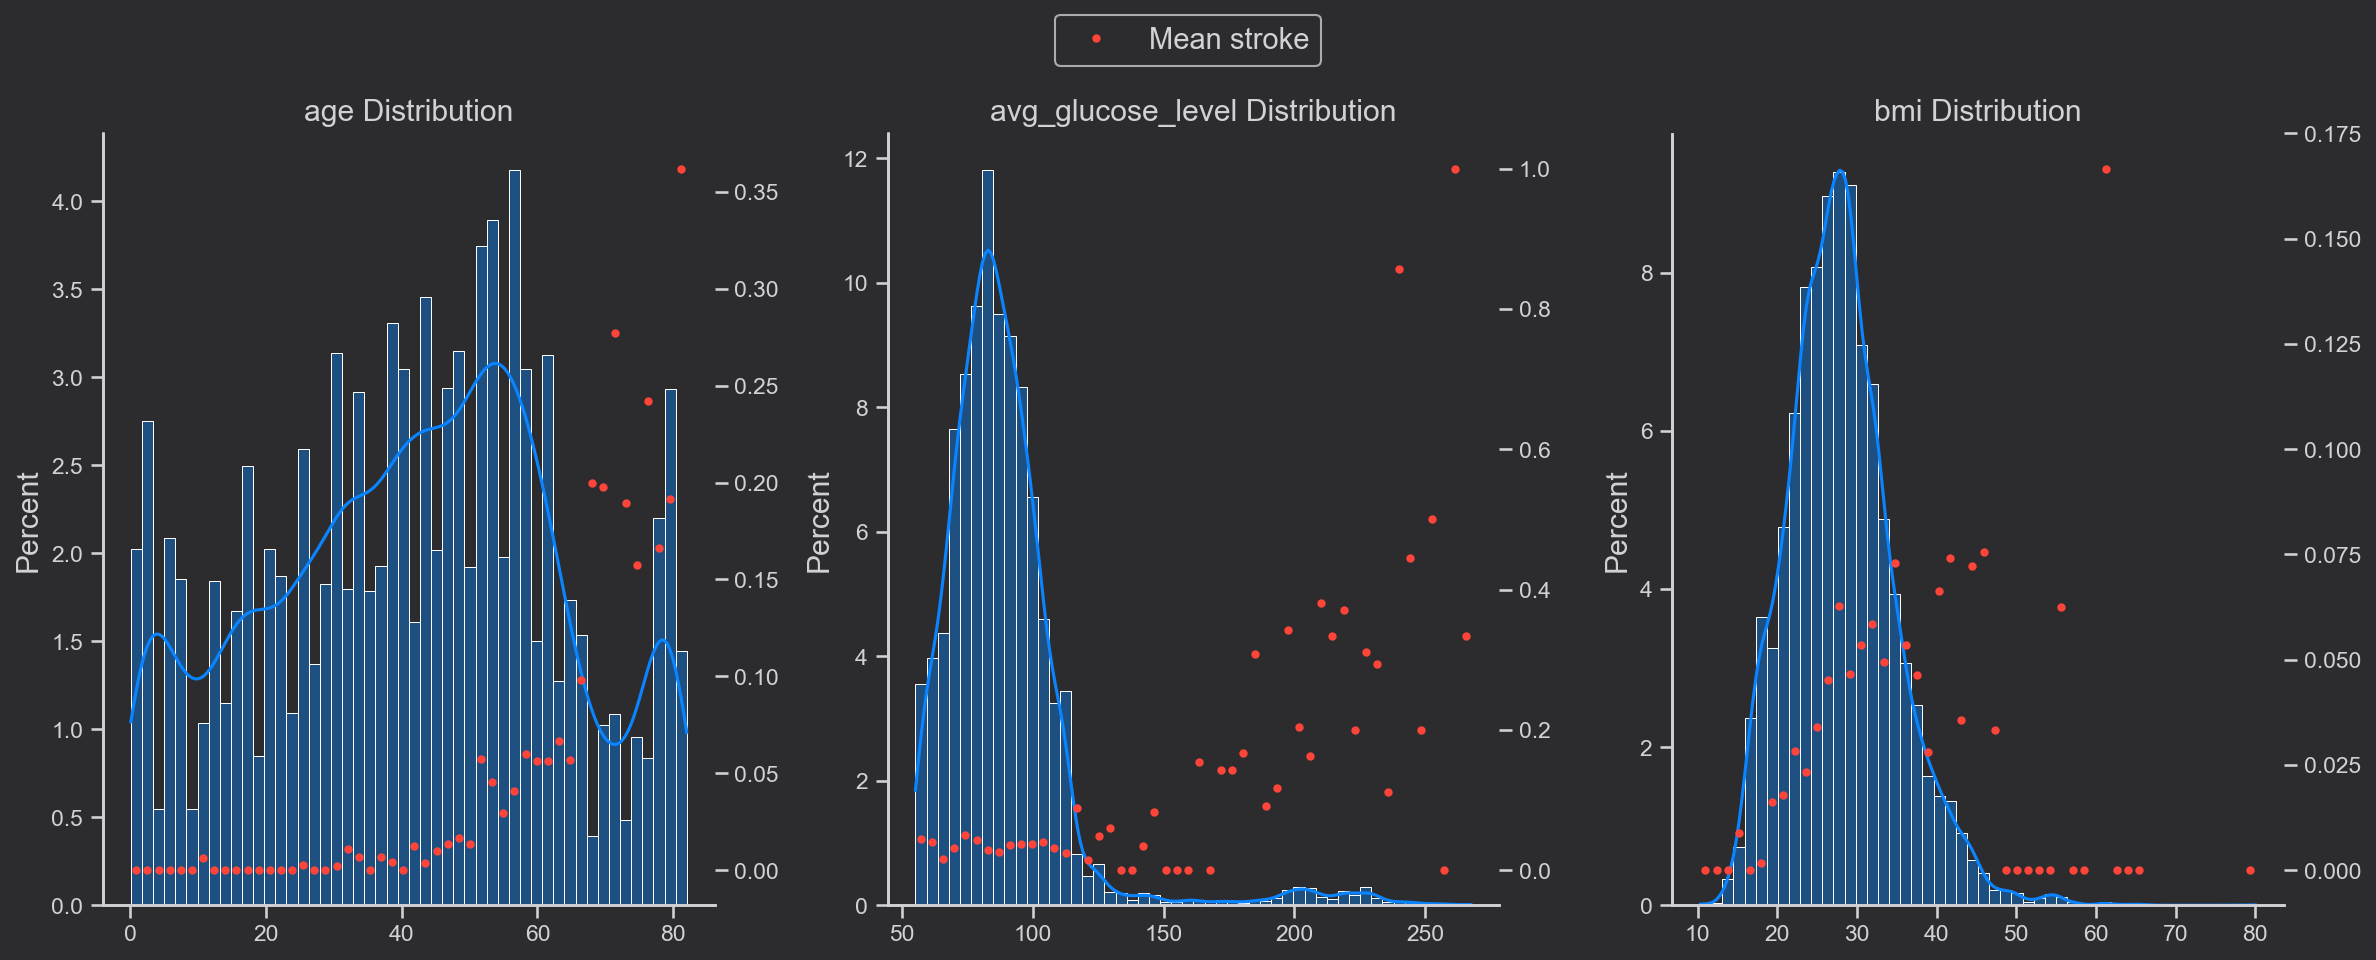

In [50]:
#function to plot the mean of the target
def secondary_plot(df, column, target_column, ax, n_bins, color=3, show_yticks=False):
    secondary_ax = ax.twinx()
    bins = pd.cut(df[column], bins=n_bins)
    bins = pd.IntervalIndex(bins)
    bins = (bins.left + bins.right) / 2
    target = df.groupby(bins)[target_column].mean()
    target.plot(
        ax=secondary_ax, linestyle='',
        marker='.', color=colors[color], label=f'Mean {target_column}'
    )
    secondary_ax.grid(visible=False)
    
    if not show_yticks:
        secondary_ax.get_yaxis().set_ticks([])
        
    return secondary_ax

n_bins = 50
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

col = len(numerical_features.columns)
rows = col // 3 + 1
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
ax = ax.flatten()

for index, col in enumerate(numerical_features):
    plot_axes = [ax[index]]
    print(index, col)
    sns.histplot(data =train, x = col, common_norm=False, ax = ax[index], **histplot_hyperparams)
    ax2 = secondary_plot(df=train, column=col, target_column='stroke', ax=ax[index], n_bins=n_bins, color=3, show_yticks=True)
    # titles
    ax[index].set_title(f'{col} Distribution')
    ax[index].set_xlabel(None)
    
    # remove legends to show only one at the end
    plot_axes = [ax[index], ax2]
    handles = []
    labels = []
    for plot_ax in plot_axes:
        if plot_ax.get_legend() is not None:
            handles += plot_ax.get_legend().legendHandles
            labels += [x.get_text() for x in plot_ax.get_legend().get_texts()]
        else:
            handles += plot_ax.get_legend_handles_labels()[0]
            labels += plot_ax.get_legend_handles_labels()[1]
            
        plot_ax.legend().remove()
    
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.08), fontsize=14, ncol=3)
plt.tight_layout()
plt.show()

Link between bmi and the target: 

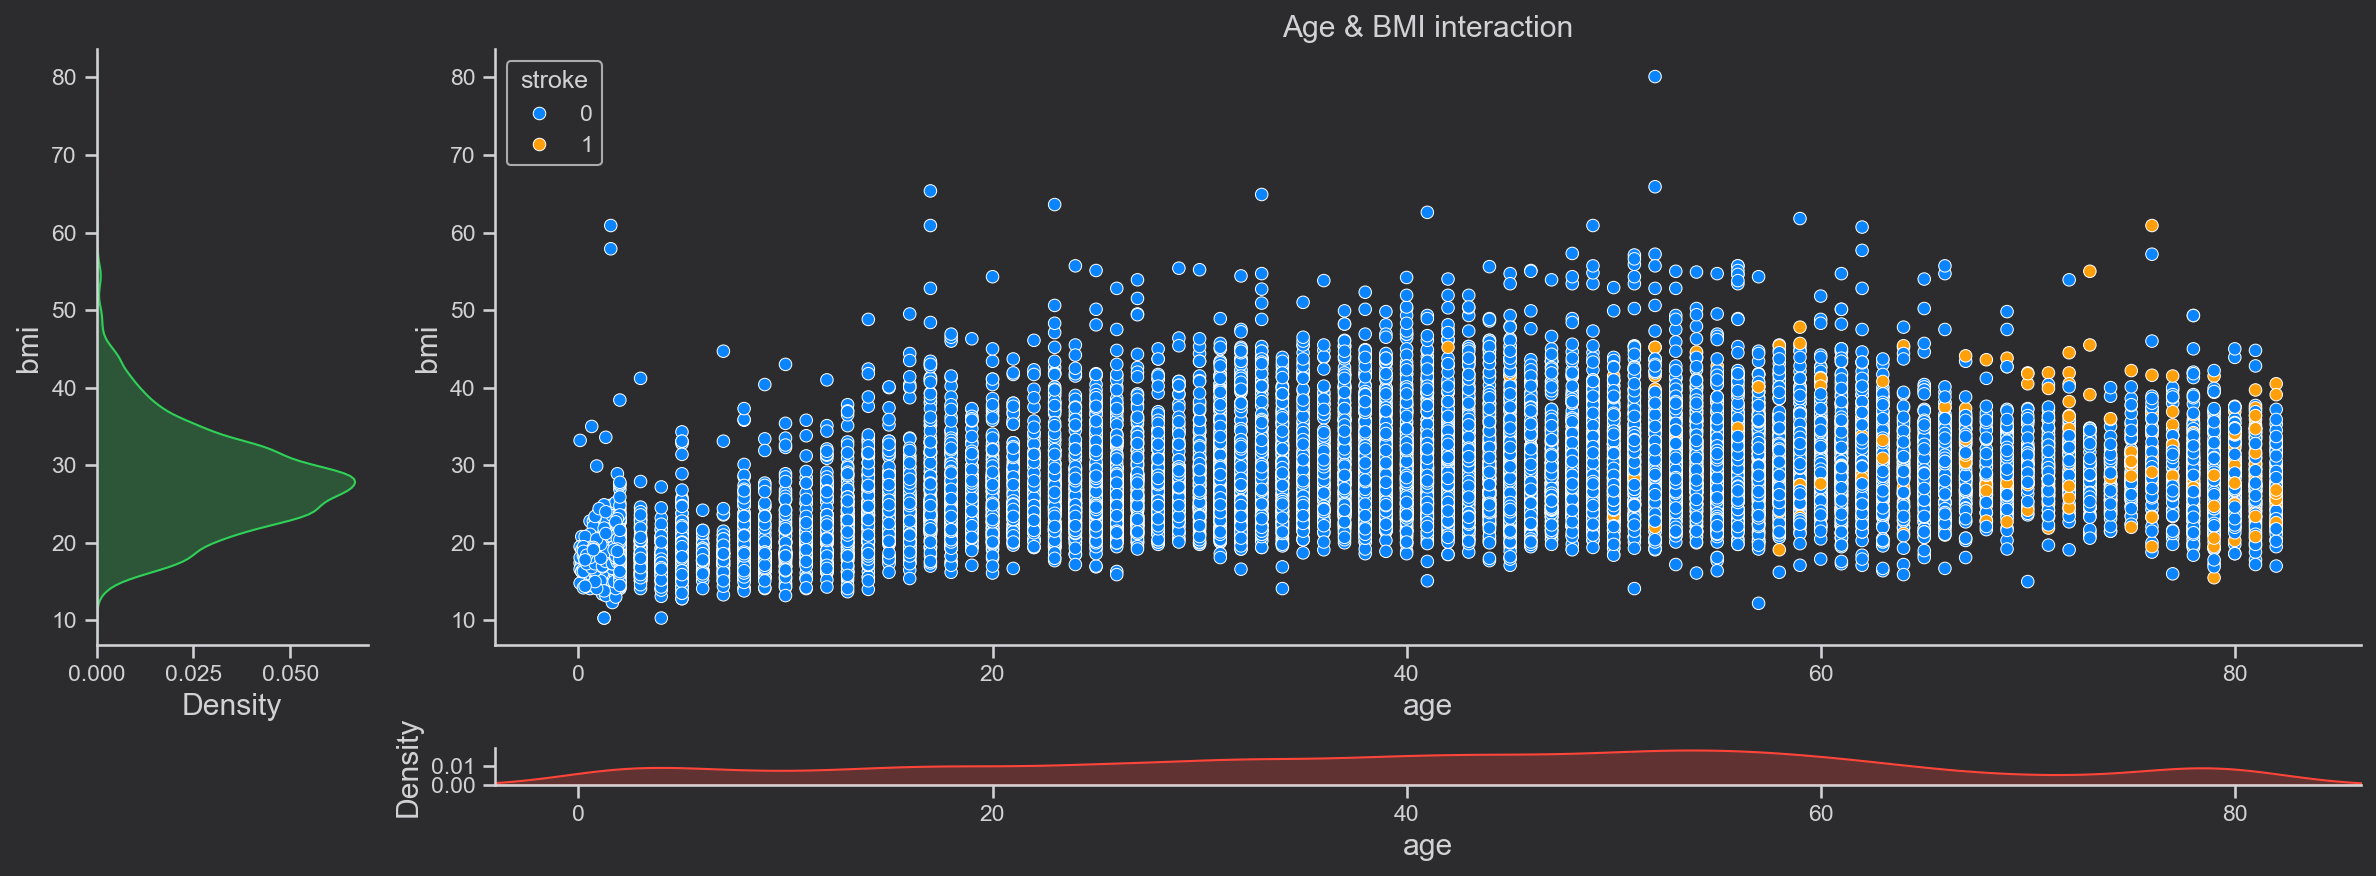

In [51]:
fig = plt.figure()
gs = fig.add_gridspec(6, 6)
ax1 = fig.add_subplot(gs[:5, 1:])
ax2 = fig.add_subplot(gs[:5, 0])
ax3 = fig.add_subplot(gs[5, 1:])

sns.scatterplot(x=train.age, y=train.bmi, hue=train.stroke, ax=ax1)
sns.kdeplot(y=train.bmi, ax=ax2, color=colors[2], fill=True)
sns.kdeplot(x=train.age, ax=ax3, color=colors[3], fill=True)

ax1.set_title('Age & BMI interaction')
legend = ax1.legend(loc='upper left')
legend.set_title('stroke')

ax2.set_ylim(ax1.get_ylim())
ax3.set_xlim(ax1.get_xlim())
plt.tight_layout()

<a id="num_feat"></a>
#### [__1.2.2 Categorical Features__](#num_feat)

C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

0 gender
1 ever_married
2 work_type
3 Residence_type


C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

4 smoking_status
5 hypertension
6 heart_disease


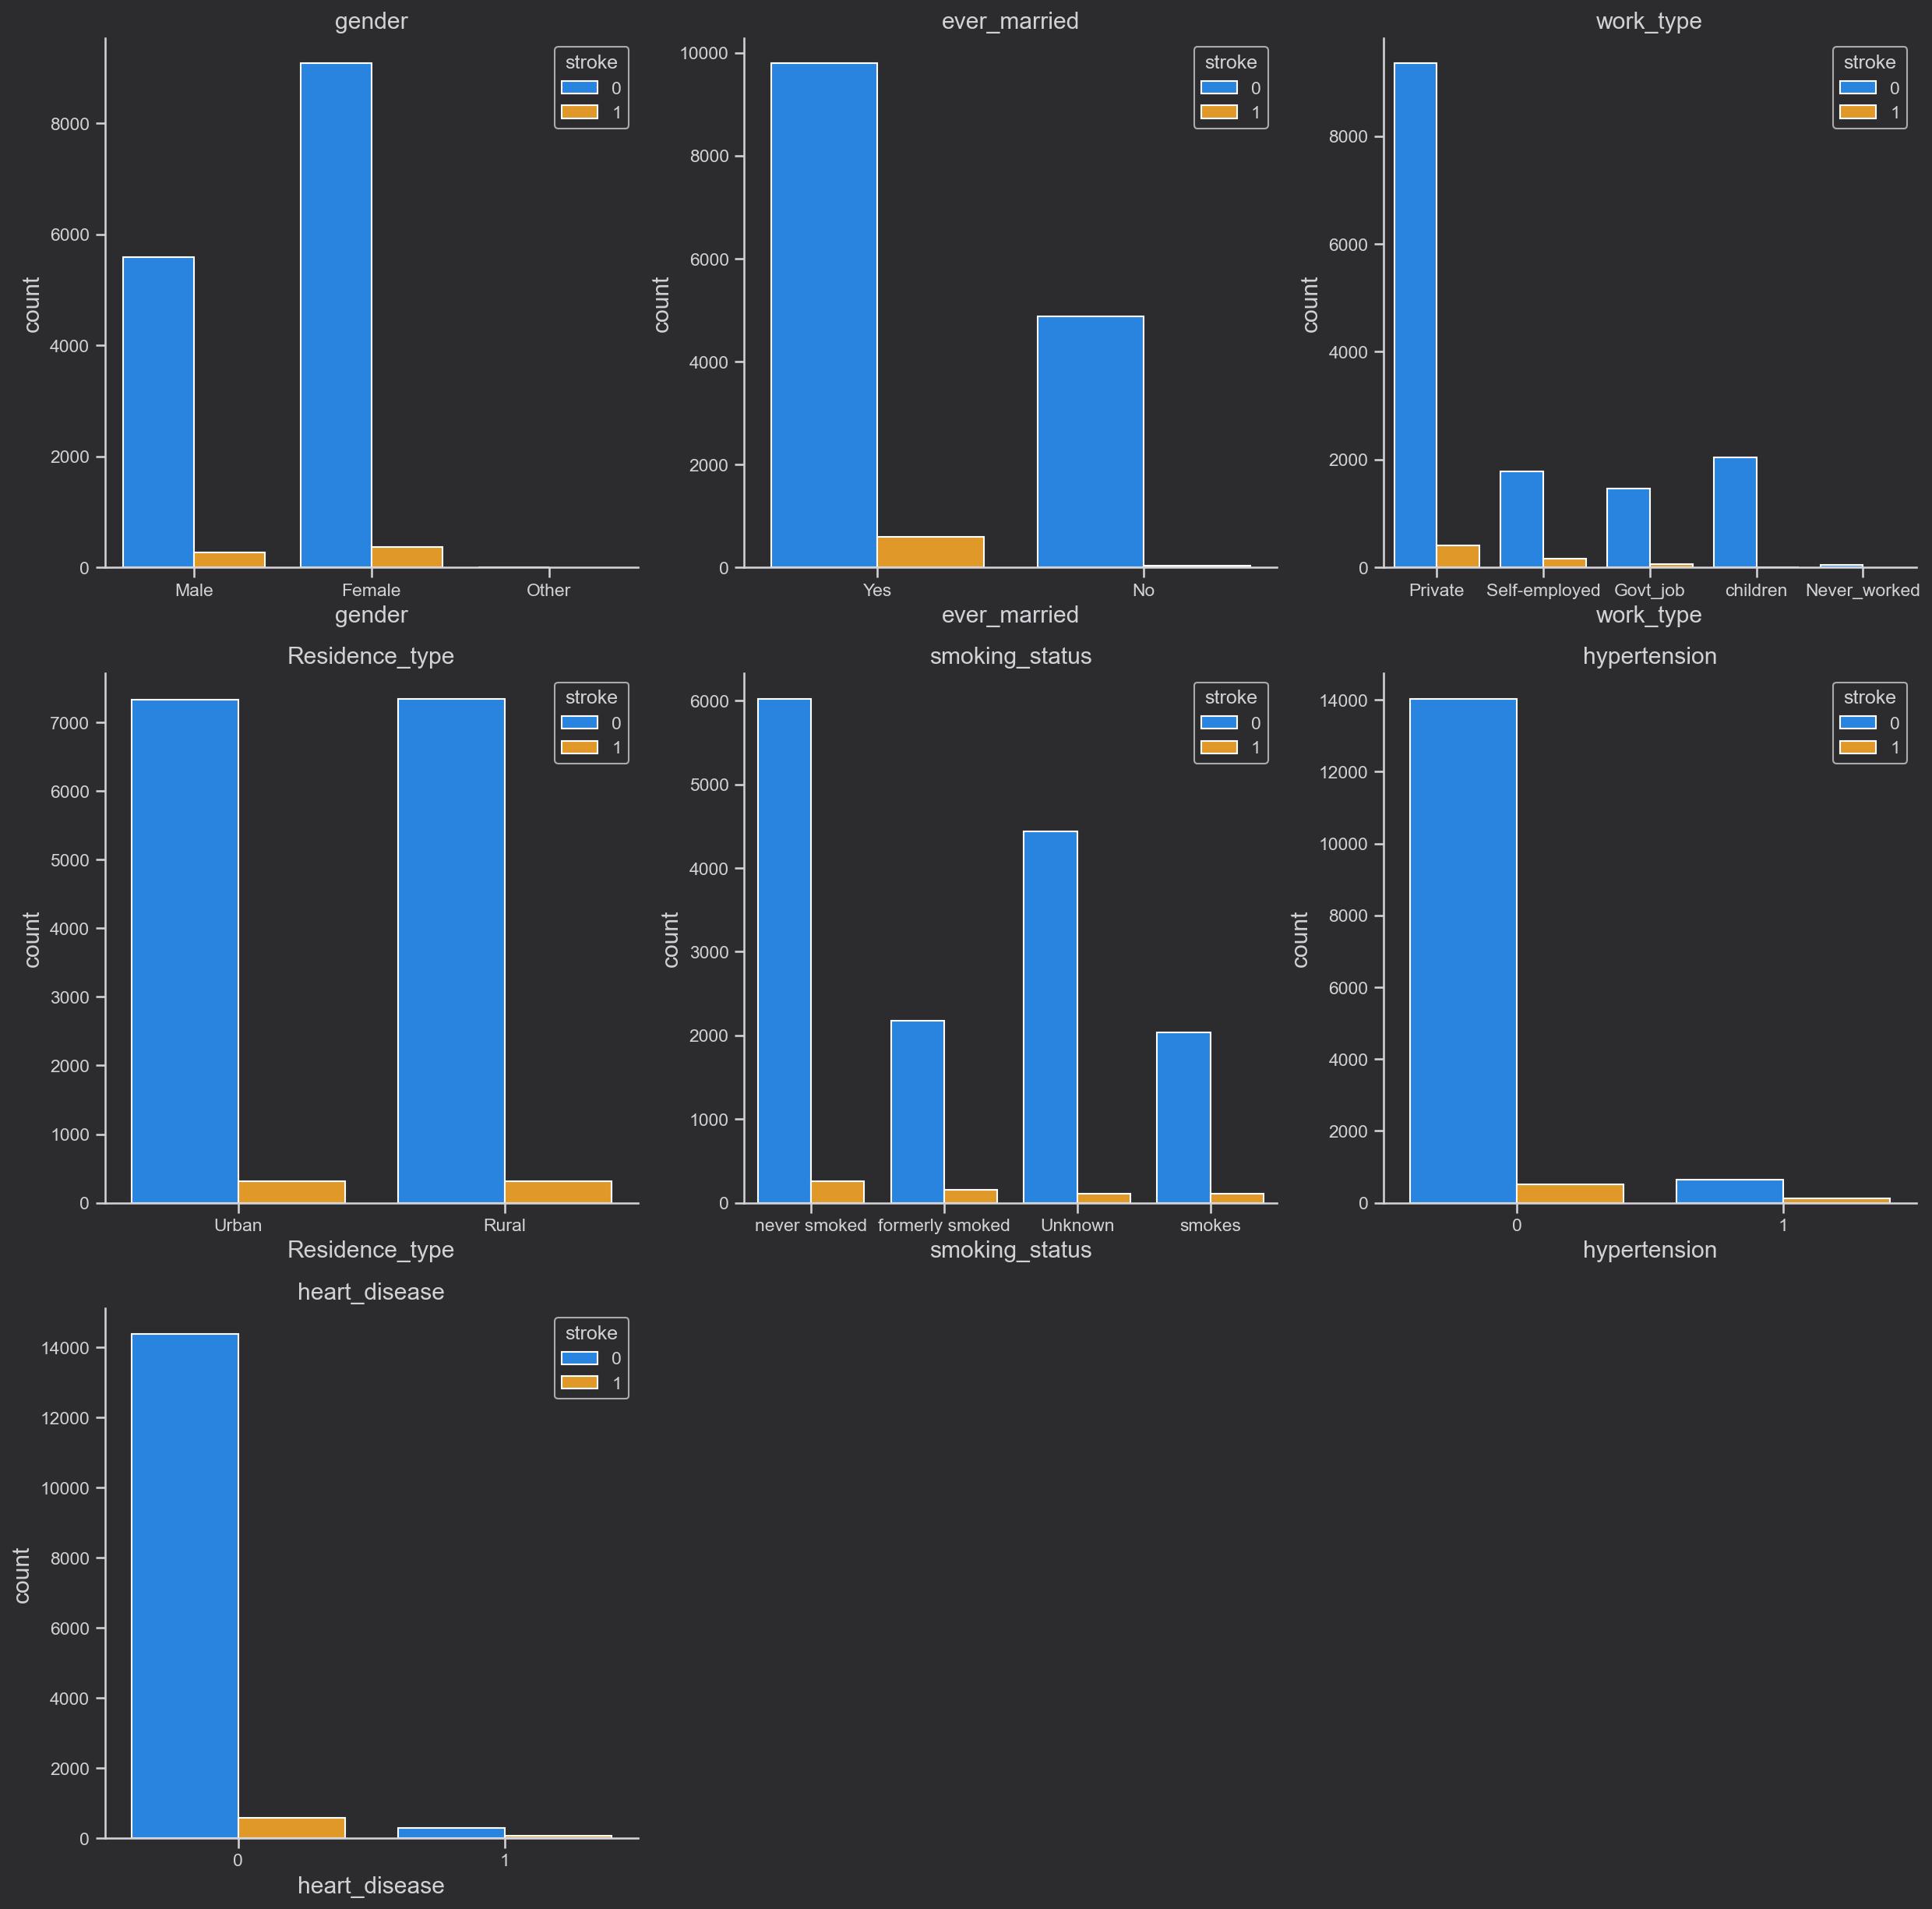

In [52]:
fig = plt.figure(figsize=(20, 20))
col = 3
rows = len(categorical_features.columns) // col + 1

for index, col in enumerate(categorical_features.columns):
    plt.subplot(rows, 3, index + 1)
    sns.countplot(x = col, data=train, hue = "stroke")
    plt.title(col)
    print(index, col)
plt.show()

<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>1.2. Bivariate analysis</b>
        </p>
</div>

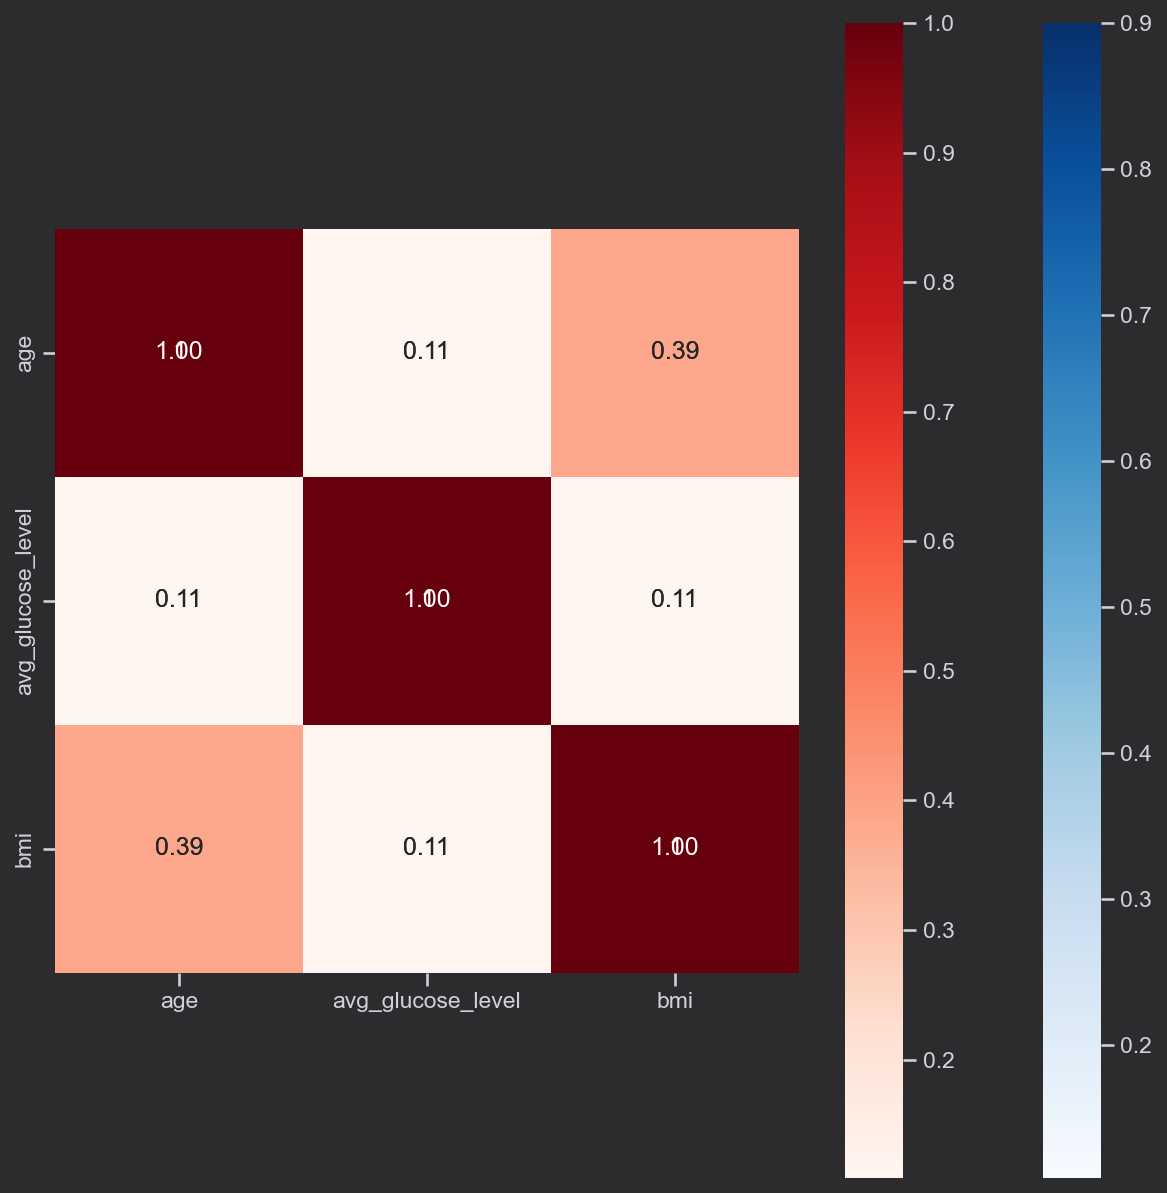

In [53]:
#correlation matrix 

corr = numerical_features.corr()
masked_corr = corr.mask(np.abs(corr)<= 0.7)* corr.mask(np.abs(corr) >= 1)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="Blues", vmax=0.9)
sns.heatmap(corr, annot=True, fmt=".2f", mask=masked_corr, square=True, cmap='Reds')
plt.show()

Bi-variate Analysis for all variables

In [54]:
print(numerical_features.columns.tolist())

['age', 'avg_glucose_level', 'bmi']


In [55]:
# fig, ax = plt.subplots(1, 1, figsize=(15, 15))
# float_types = [np.float16, np.float32, np.float64]
# float_columns = train.select_dtypes(include=float_types).columns
# cbar_ax = fig.add_axes([.91, .39, .01, .2])
# vmax, vmin = 0.5, 0

# corr = associations(
#         train, numerical_columns=numerical_features.columns.tolist(),
#         nominal_columns=categorical_features.columns.tolist(),
#         compute_only=True,
#         ax=ax,
#         plot=False
#     )['corr']
    
# mask = np.triu(np.ones_like(corr, dtype=bool))
# sns.heatmap(
#     corr, mask=mask, cmap='inferno',
#     vmax=vmax, vmin=vmin,
#     center=0, annot=True, fmt='.2f',
#     square=True, linewidths=.1,
#     cbar=True,
#     cbar_ax=cbar_ax,
#     annot_kws={"size": 8}
# )

# fig.tight_layout(rect=[0, 0, .9, 1])
# plt.show()


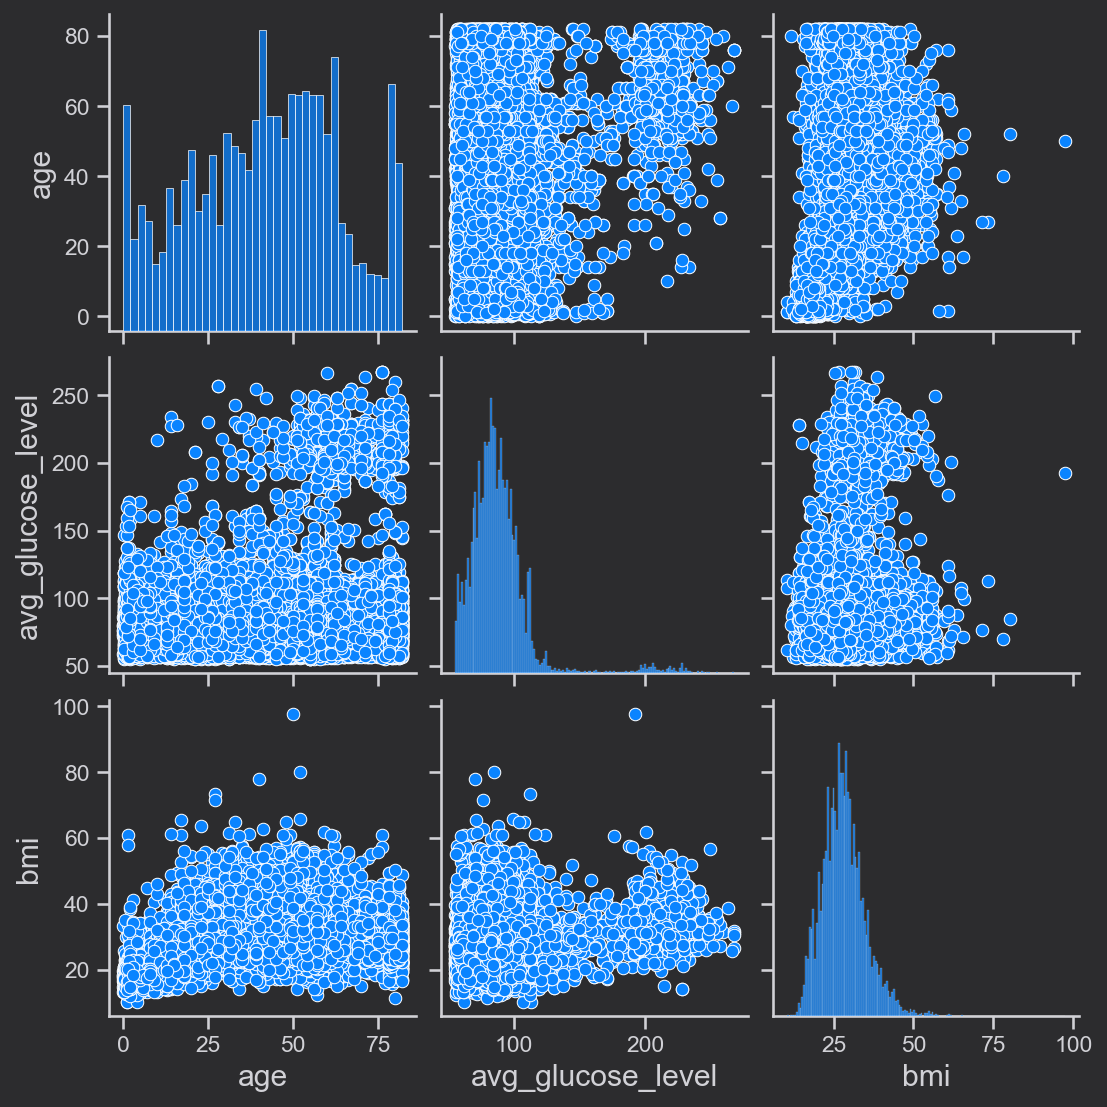

In [56]:
#scatter plot the numerical features for a visual representation of the correlation
sns.pairplot(numerical_features)

<div style="color:#00ADB5;
           display:fill;
           border-radius:10px;
           background-color:#393E46;
           font-size:30px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 5px; padding-left:20px;
              color:white;">
            <b>   2. Data Cleaning</b>
        </p>
</div>

<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>2.1. Removing Correlated Features</b>
        </p>
</div>

D'après la matrice de corrélation ci-dessus, il n'y pas de features fortement corrélées que nous devrions enlever

<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>2.2. Dealing with NaN</b>
        </p>
</div>

In [57]:
#Display the count of NaN values in each column
print(X.isna().sum())
all_data = pd.concat([train.drop("stroke", axis=1),test], axis=0).reset_index(drop=True).drop("id", axis=1)
stroke = train["stroke"]
print((all_data["smoking_status"] == "Unknown").sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64
7519


In [58]:
#Replacing unknown by never skmoked because the distribution regarding storkes look alike
all_data["smoking_status"].replace({"Unknown": all_data["smoking_status"].mode()[0]}, inplace=True)

C:\Users\ilias\AppData\Local\Temp\ipykernel_33732\3634638194.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data["smoking_status"].replace({"Unknown": all_data["smoking_status"].mode()[0]}, inplace=True)


<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>2.3. Dealing with outliers</b>
        </p>
</div>

C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float

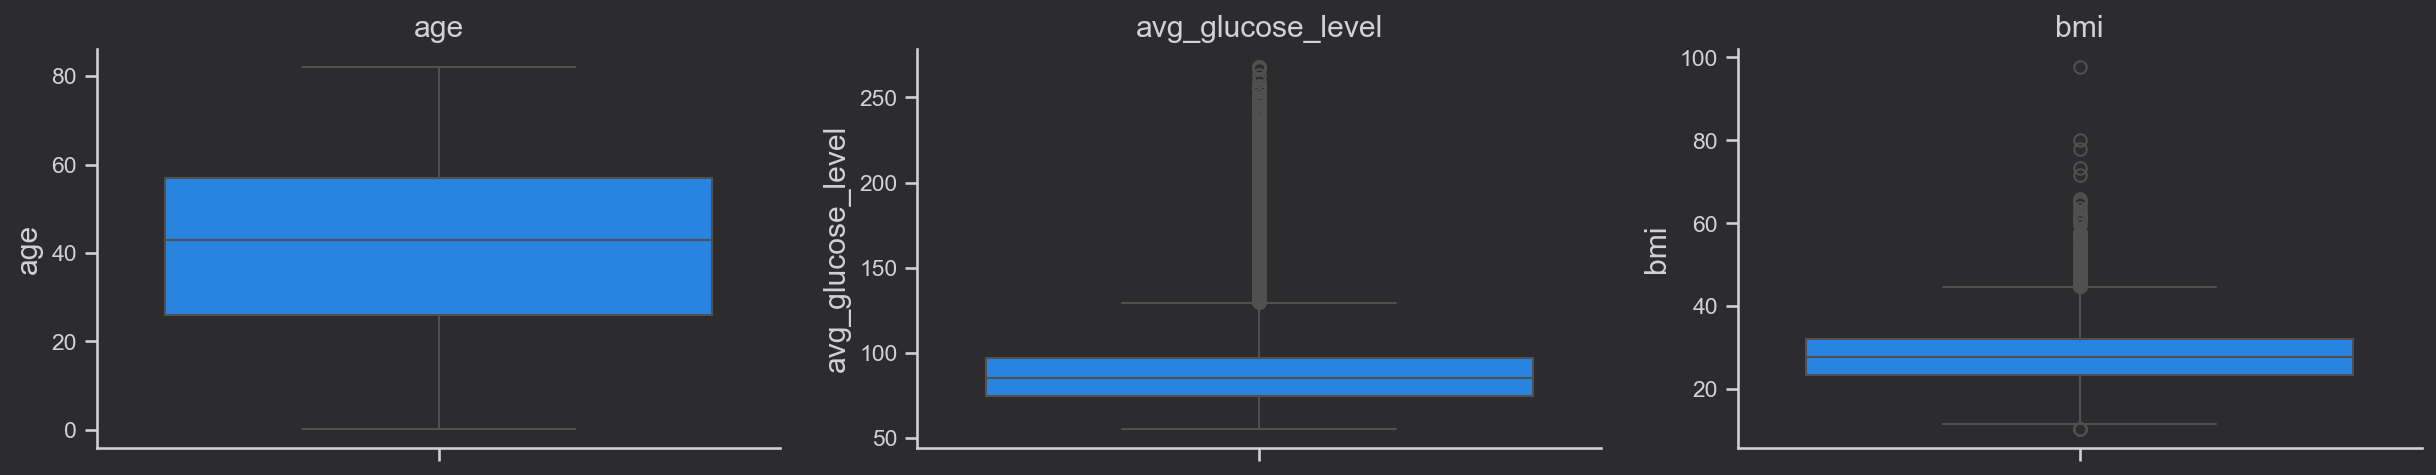

In [59]:
fig = plt.figure(figsize=(20, 20))
col = numerical_features.columns
for index, col in enumerate(numerical_features):
    plt.subplot(5, 3, index + 1)
    sns.boxplot(y = col, data=all_data)
    plt.title(col)

C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='bmi'>

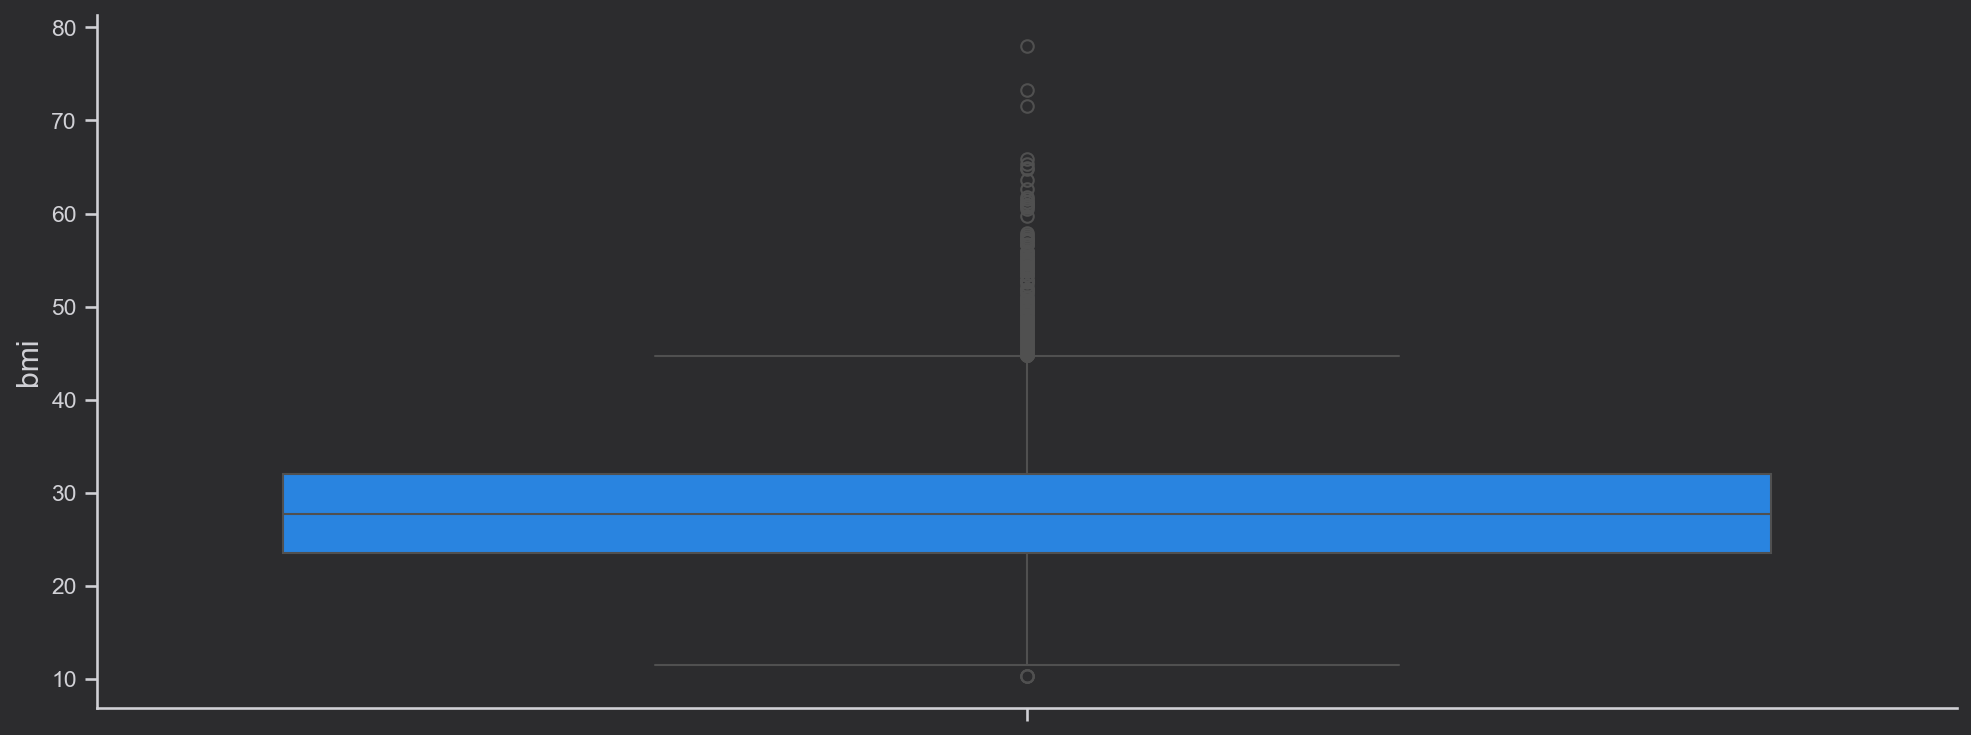

In [60]:
#delete outliers
index = all_data[all_data["bmi"] > 80].index
all_data.drop(index, inplace=True)
#stroke.drop(index, inplace=True)
sns.boxplot(y = "bmi", data=all_data)

<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>2.3. Mapping features</b>
        </p>
</div>

In [61]:
all_data.head()

gender   age  hypertension  heart_disease ever_married work_type  \
0    Male  28.0             0              0          Yes   Private   
1    Male  33.0             0              0          Yes   Private   
2  Female  42.0             0              0          Yes   Private   
3    Male  56.0             0              0          Yes   Private   
4  Female  24.0             0              0           No   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  
0          Urban              79.53  31.1     never smoked  
1          Rural              78.44  23.9  formerly smoked  
2          Rural             103.00  40.3     never smoked  
3          Urban              64.87  28.8     never smoked  
4          Rural              73.36  28.8     never smoked

<div style="color:#00ADB5;
           display:fill;
           border-radius:10px;
           background-color:#393E46;
           font-size:30px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 5px; padding-left:20px;
              color:white;">
            <b>   3. Feature Engineering</b>
        </p>
</div>

In [62]:
#adding features that may seem meaningful
all_data["heart_disease_hypertension"] = all_data["heart_disease"] * all_data["hypertension"]
all_data["avg_glucose_level_bmi"] = all_data["avg_glucose_level"] * all_data["bmi"]
all_data.head()


gender   age  hypertension  heart_disease ever_married work_type  \
0    Male  28.0             0              0          Yes   Private   
1    Male  33.0             0              0          Yes   Private   
2  Female  42.0             0              0          Yes   Private   
3    Male  56.0             0              0          Yes   Private   
4  Female  24.0             0              0           No   Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  \
0          Urban              79.53  31.1     never smoked   
1          Rural              78.44  23.9  formerly smoked   
2          Rural             103.00  40.3     never smoked   
3          Urban              64.87  28.8     never smoked   
4          Rural              73.36  28.8     never smoked   

   heart_disease_hypertension  avg_glucose_level_bmi  
0                           0               2473.383  
1                           0               1874.716  
2                           0               4150.900  
3                           0               1868.256  
4                           0               2112.768

In [63]:
#binning the data
all_data['bmi_cat'] = pd.cut(all_data['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
all_data['age_cat'] = pd.cut(all_data['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
all_data['glucose_cat'] = pd.cut(all_data['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

In [64]:
#unskewing the data
all_data['age'] = all_data['age'].apply(lambda x: np.log(x+10)*3)
all_data['avg_glucose_level'] = all_data['avg_glucose_level'].apply(lambda x: np.log(x+10)*2)
all_data['bmi'] = all_data['bmi'].apply(lambda x: np.log(x+10)*2)

In [65]:
df_train_num = train.select_dtypes(exclude=['object']).copy()
df_train_num = df_train_num.drop(["hypertension", "heart_disease"], axis=1)

categorical_features = train.select_dtypes(include=['object']).copy()
categorical_features["hypertension"] = train["hypertension"].astype("object")
categorical_features["heart_disease"] = train["heart_disease"].astype("object")


#Find most important features relative to target
print("Find most important features relative to target")
corr = df_train_num.corr()
corr.sort_values(["stroke"], ascending = False, inplace = True)
corr.stroke.head(11)

Find most important features relative to target


stroke               1.000000
age                  0.261320
avg_glucose_level    0.149273
bmi                  0.065393
id                  -0.017290
Name: stroke, dtype: float64

In [66]:
#add polynomial features for the most important features
all_data["age^2"] = all_data["age"] ** 2
all_data["age^3"] = all_data["age"] ** 3

In [67]:
categorical_features = all_data.select_dtypes(include = ["object"]).columns
numerical_features = all_data.select_dtypes(exclude = ["object"]).columns

numerical_features = numerical_features.drop(["hypertension", "heart_disease", "heart_disease_hypertension"])
ordinal_features = ["age_cat", "glucose_cat", "bmi_cat", "hypertension", "heart_disease", "heart_disease_hypertension"]

all_data_num = all_data[numerical_features]
all_data_cat = all_data[categorical_features]
all_data_ord = all_data[ordinal_features]

all_data_num.head()

age  avg_glucose_level       bmi  avg_glucose_level_bmi     bmi_cat  \
0  10.912758           8.989148  7.432016               2473.383     Obesity   
1  11.283600           8.964649  7.046830               1874.716       Ideal   
2  11.853731           9.454776  7.836010               4150.900     Obesity   
3  12.568964           8.631507  7.316840               1868.256  Overweight   
4  10.579082           8.846337  7.316840               2112.768  Overweight   

      age_cat glucose_cat       age^2        age^3  
0      Adults         Low  119.088298  1299.581830  
1      Adults         Low  127.319637  1436.623898  
2      Adults      Normal  140.510942  1665.578935  
3  Mid Adults         Low  157.978862  1985.630661  
4      Adults         Low  111.916967  1183.978723

In [68]:
all_data_cat.head()

gender ever_married work_type Residence_type   smoking_status
0    Male          Yes   Private          Urban     never smoked
1    Male          Yes   Private          Rural  formerly smoked
2  Female          Yes   Private          Rural     never smoked
3    Male          Yes   Private          Urban     never smoked
4  Female           No   Private          Rural     never smoked

In [69]:
all_data_ord.head()

age_cat glucose_cat     bmi_cat  hypertension  heart_disease  \
0      Adults         Low     Obesity             0              0   
1      Adults         Low       Ideal             0              0   
2      Adults      Normal     Obesity             0              0   
3  Mid Adults         Low  Overweight             0              0   
4      Adults         Low  Overweight             0              0   

   heart_disease_hypertension  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

In [70]:
all_data_ord['heart_disease'].value_counts()

heart_disease
0    24928
1      578
Name: count, dtype: int64

unskew the distributions

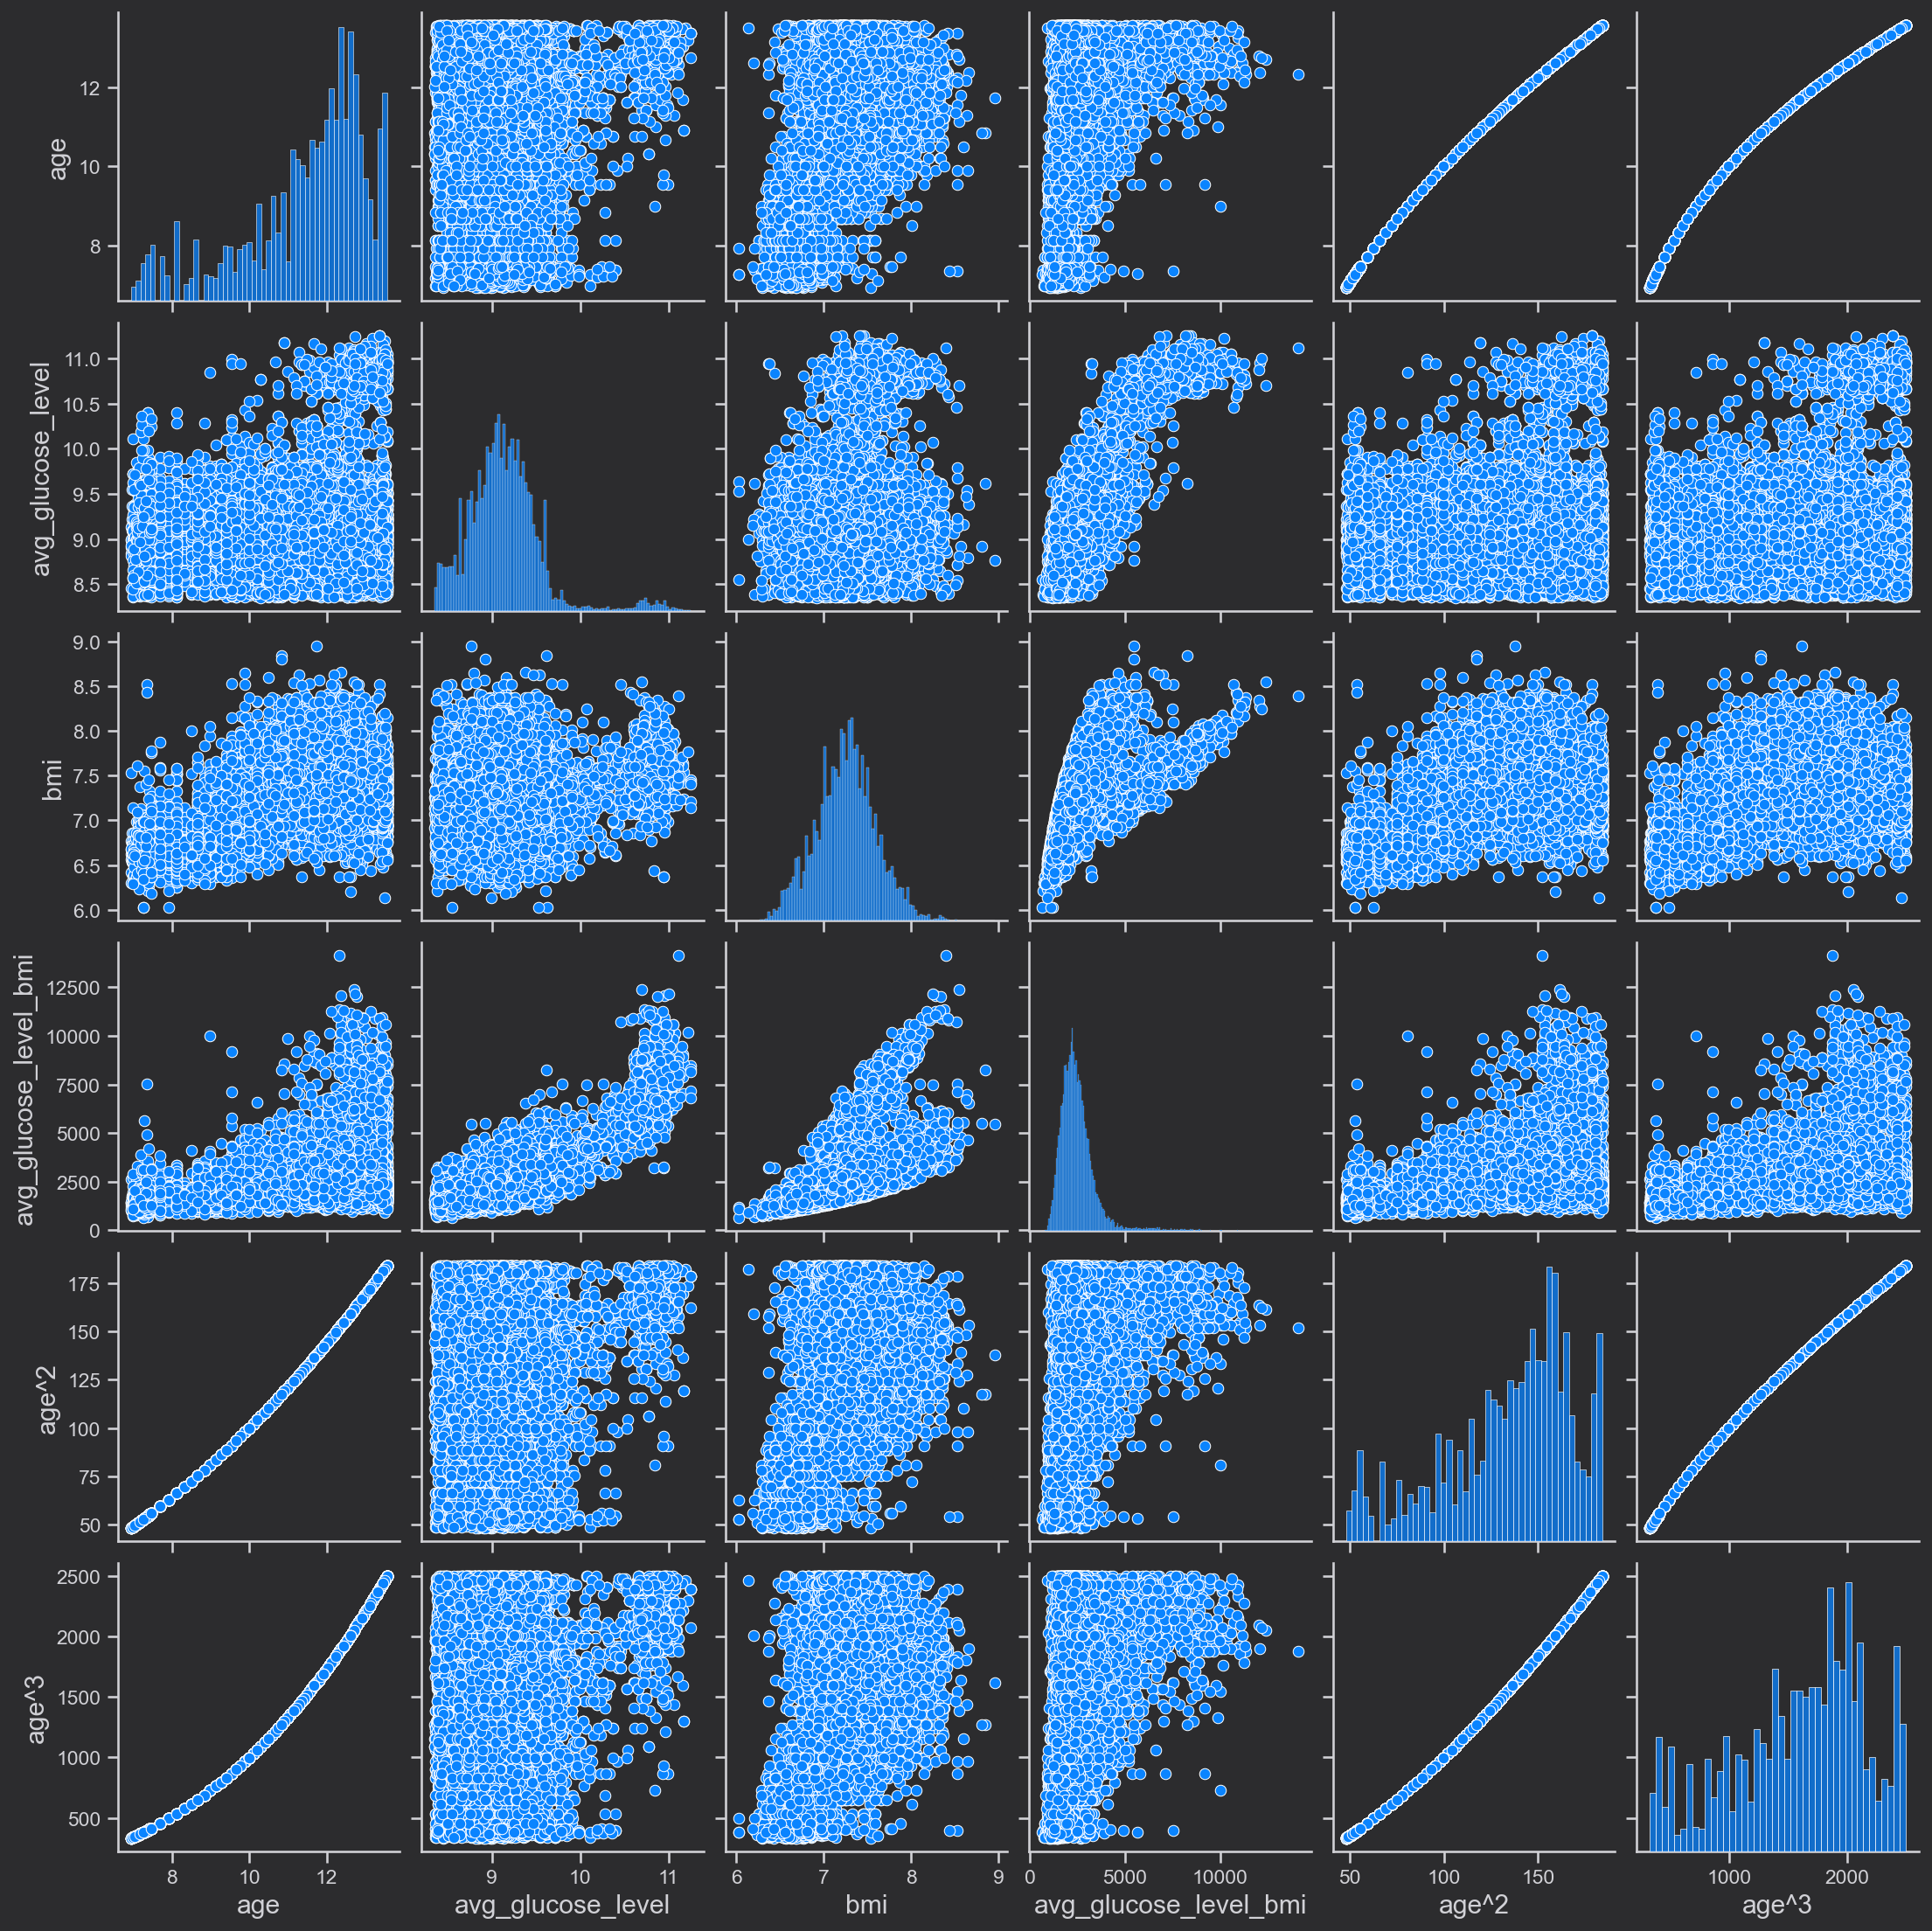

In [71]:
sns.pairplot(all_data_num)

In [72]:
all_data_cat.head()

gender ever_married work_type Residence_type   smoking_status
0    Male          Yes   Private          Urban     never smoked
1    Male          Yes   Private          Rural  formerly smoked
2  Female          Yes   Private          Rural     never smoked
3    Male          Yes   Private          Urban     never smoked
4  Female           No   Private          Rural     never smoked

In [73]:
#compte le nombre de valeurs positives dans hypertension et heart_disease
print(all_data["hypertension"].value_counts())
print(all_data["heart_disease"].value_counts())

hypertension
0    24220
1     1286
Name: count, dtype: int64
heart_disease
0    24928
1      578
Name: count, dtype: int64


In [90]:
X.head()

age  avg_glucose_level       bmi avg_glucose_level_bmi  bmi_cat  \
0 -0.350461          -0.361934  0.523592              2473.383        1   
1 -0.117233          -0.420149 -0.589465              1874.716        0   
2  0.241330           0.744505  1.690998                4150.9        1   
3  0.691150          -1.211772  0.190773              1868.256        2   
4 -0.560315          -0.701285  0.190773              2112.768        2   

   age_cat  glucose_cat       age^2        age^3  hypertension  ...  \
0        0            1  119.088298   1299.58183             0  ...   
1        0            1  127.319637  1436.623898             0  ...   
2        0            2  140.510942  1665.578935             0  ...   
3        3            1  157.978862  1985.630661             0  ...   
4        0            1  111.916967  1183.978723             0  ...   

   work_type_Govt_job work_type_Never_worked  work_type_Private  \
0               False                  False               True   
1               False                  False               True   
2               False                  False               True   
3               False                  False               True   
4               False                  False               True   

   work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                    False               False                 False   
1                    False               False                  True   
2                    False               False                  True   
3                    False               False                 False   
4                    False               False                  True   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                  True                           False   
1                 False                            True   
2                 False                           False   
3                  True                           False   
4                 False                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                         True                  False  
1                        False                  False  
2                         True                  False  
3                         True                  False  
4                         True                  False  

[5 rows x 27 columns]

In [107]:
# preprocessing - label enconding and numerical value scaling
ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()

X = np.hstack((all_data_num, all_data_cat, all_data_ord))
X = pd.DataFrame(X, columns = all_data_num.columns.tolist() + all_data_cat.columns.tolist() + all_data_ord.columns.tolist())
y = train["stroke"]
#delete duplicated columns
X = X.loc[:,~X.columns.duplicated()]

X = X[:len(train)]

ordinal = ['age_cat',  'glucose_cat', 'bmi_cat','hypertension', 'heart_disease', "heart_disease_hypertension"] # label enconding
nominal =  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
numerical = ['age','bmi', 'avg_glucose_level', 'avg_glucose_level_bmi', 'age^2', 'age^3'] 

# ## label encoding of ordinal categorical features
for col in ordinal:
    X[col] = le.fit_transform(X[col])
    
# ## normalizing with standard scaler of numerical features
X[numerical] = ss.fit_transform(X[numerical])

# ## norminal data one hot encoding for categorical features
temp = X.drop(columns = nominal, axis = 1)
dummies = pd.get_dummies(X[nominal])
X = pd.concat([temp,dummies], axis = 1)


# Umap -  Uniform Manifold Approximation and Projection
umap = umap_module.UMAP(random_state=2024)
stroke_umap = umap.fit_transform(X, y)

age_cat
glucose_cat
bmi_cat
hypertension
heart_disease
heart_disease_hypertension


C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


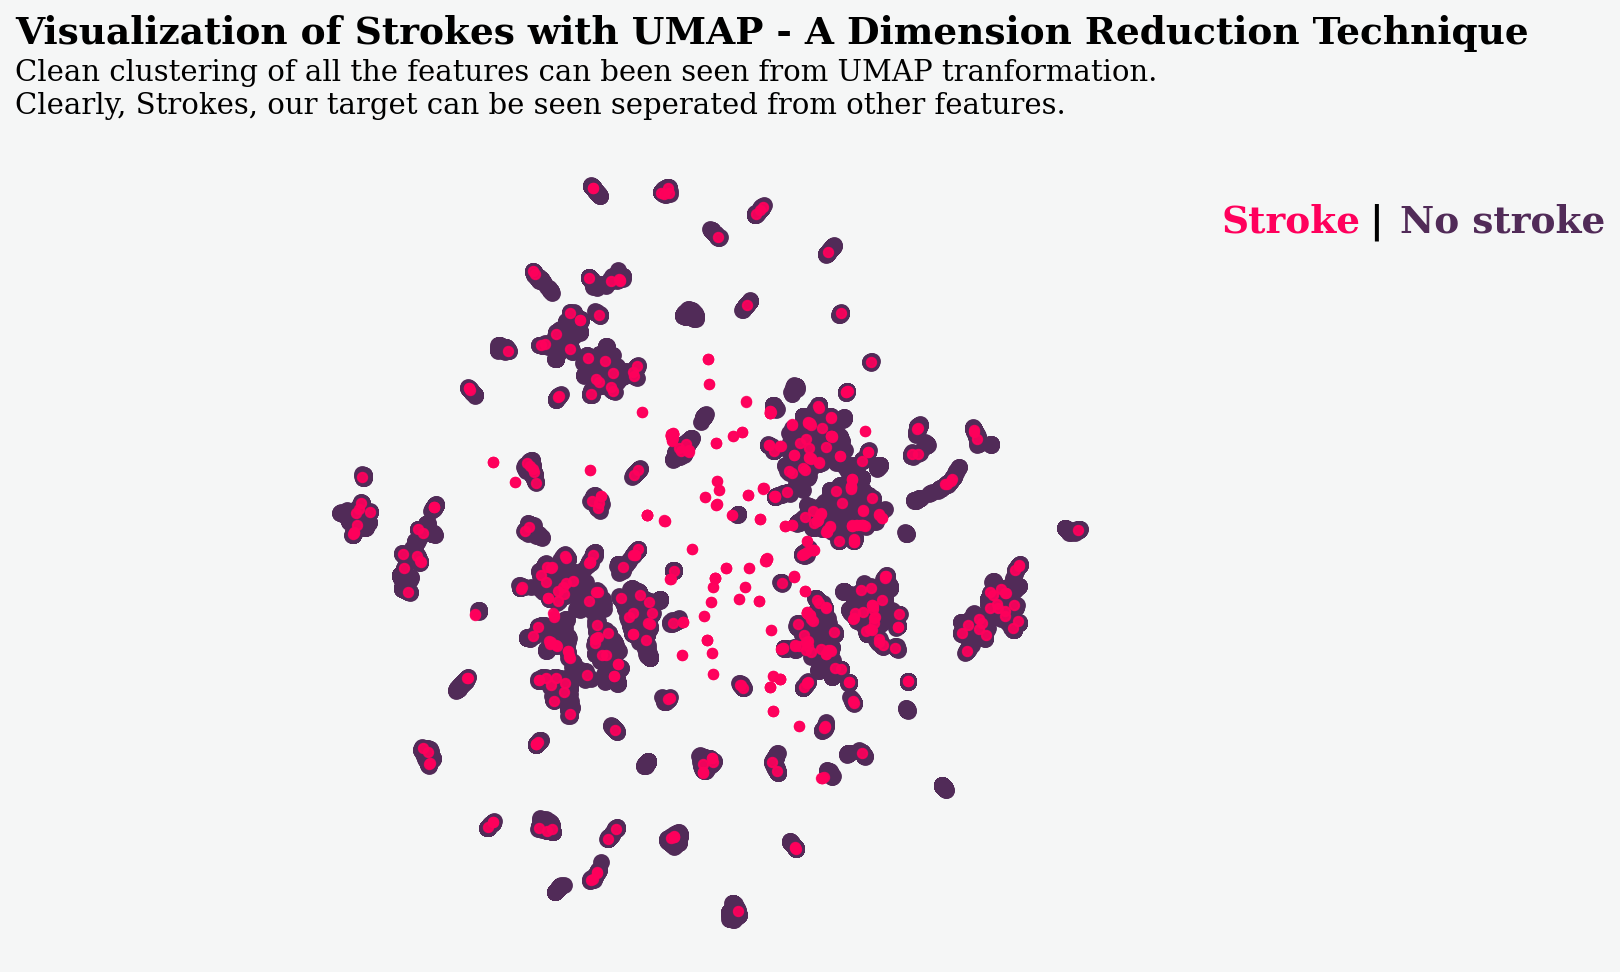

In [108]:
fig = plt.figure(figsize=(7,7))# # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])


# Change background color
background_color = "#f5f6f6"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


ax0.scatter(stroke_umap[train['stroke'] == 0][:,0], stroke_umap[train['stroke'] == 0][:,1], c='#512b58', alpha=1,s=50)
ax0.scatter(stroke_umap[train['stroke'] == 1][:,0], stroke_umap[train['stroke'] == 1][:,1], c='#ff005c', alpha=0.9,s=20)


ax0.text(-25, 24, 'Clean clustering of all the features can been seen from UMAP tranformation. \nClearly, Strokes, our target can be seen seperated from other features.',fontsize=14, fontfamily='serif', color="black")

ax0.text(-25, 27, 'Visualization of Strokes with UMAP - A Dimension Reduction Technique', 
        fontsize=18, fontweight='bold', fontfamily='serif', color="black")


for s in ["top","right","left","bottom"]:
    ax0.spines[s].set_visible(False)

ax0.set_xticks([])
ax0.set_yticks([])

fig.text(1,0.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=18, color='#ff005c')
fig.text(1.14,0.8,"|", fontweight="bold", fontfamily='serif', fontsize=18, color='black')
fig.text(1.17,0.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=18, color='#512b58')

plt.show()

<div style="color:#00ADB5;
           display:fill;
           border-radius:10px;
           background-color:#393E46;
           font-size:30px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 5px; padding-left:20px;
              color:white;">
            <b>   4. Modeling</b>
        </p>
</div>

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, recall_score,precision_score, f1_score, accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
#import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>4.1. Split Data (Train/Test)</b>
        </p>
</div>

In [110]:
len_train = train.shape[0]
print(len_train)
len_test = test.shape[0]
print(len_test)
print(len(all_data))

15304
10204
25506


In [111]:
all_data = pd.concat([all_data_num, all_data_cat], axis = 1)
df_train = all_data[:len_train]
df_test = all_data[len_train:]

numerical_features = all_data_num.columns
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, stroke, test_size = 0.20, random_state = 0, shuffle=True)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))


X_train : (12243, 27)
X_test : (3061, 27)
y_train : (12243,)
y_test : (3061,)


In [112]:
pd.concat([X_train, y_train], axis=1)

age  avg_glucose_level       bmi  avg_glucose_level_bmi  bmi_cat  \
7686  -0.560315           0.150822 -0.521672              -0.317723        0   
6248   0.129213          -0.137979 -0.851018              -0.599319        0   
11396  0.447361           1.116486  0.784771               1.100659        1   
7003   0.603379           4.438753 -0.226074               3.386497        2   
3733   0.662345          -1.780903 -0.438033              -1.045684        0   
...         ...                ...       ...                    ...      ...   
13123  0.542511           0.544363 -0.021614               0.161305        2   
3264  -0.926638           0.361020 -0.454664              -0.180476        0   
9845   0.881343           3.516863  1.849656               5.130462        1   
10799  0.719523           0.418121  0.409990               0.346862        1   
2732   1.297181          -0.820203  0.851585              -0.123801        1   

       age_cat  glucose_cat     age^2     age^3  hypertension  ...  \
7686         0            1 -0.653110 -0.731240             0  ...   
6248         0            1  0.065602 -0.000415             0  ...   
11396        3            2  0.421090  0.386835             0  ...   
7003         3            3  0.600928  0.588909             0  ...   
3733         3            1  0.669841  0.667415             0  ...   
...        ...          ...       ...       ...           ...  ...   
13123        3            2  0.530336  0.509103             0  ...   
3264         4            2 -1.006132 -1.062952             0  ...   
9845         2            0  0.930315  0.969426             0  ...   
10799        3            2  0.737159  0.744673             0  ...   
2732         2            1  1.444568  1.589475             0  ...   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
7686                    False               True                    False   
6248                    False               True                    False   
11396                   False              False                    False   
7003                    False               True                    False   
3733                    False               True                    False   
...                       ...                ...                      ...   
13123                   False               True                    False   
3264                    False               True                    False   
9845                    False              False                    False   
10799                   False               True                    False   
2732                    False               True                    False   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
7686                False                  True                 False   
6248                False                  True                 False   
11396               False                  True                 False   
7003                False                  True                 False   
3733                False                  True                 False   
...                   ...                   ...                   ...   
13123               False                  True                 False   
3264                False                  True                 False   
9845                False                 False                  True   
10799               False                 False                  True   
2732                False                 False                  True   

       smoking_status_formerly smoked  smoking_status_never smoked  \
7686                            False                         True   
6248                            False                         True   
11396                           False                         True   
7003                            False                         True   
3733                            False                     

<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>4.2. Scaling of the Data</b>
        </p>
</div>

In [113]:
#SMOTE
smote = SMOTE(random_state=42, sampling_strategy=1, k_neighbors=3)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
#count the number of strokes in the resampled data
print(X_train_res.shape)

(23462, 27)


In [114]:
def model_evaluation(actual,pred):
    print('Recall:    ',recall_score(actual,pred),end='\n')
    print('Precision: ',precision_score(actual,pred),end='\n')
    print('Accuracy:  ',accuracy_score(actual,pred),end='\n')
    print('F1 score:  ',f1_score(actual,pred),end='\n')
 
    cm = confusion_matrix(actual,pred)
    sns.heatmap(cm, annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title("confusion matrix")
    plt.show()

<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>4.2. Training Algorithms</b>
        </p>
</div>

In [115]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12243 entries, 7686 to 2732
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             12243 non-null  float64
 1   avg_glucose_level               12243 non-null  float64
 2   bmi                             12243 non-null  float64
 3   avg_glucose_level_bmi           12243 non-null  float64
 4   bmi_cat                         12243 non-null  int32  
 5   age_cat                         12243 non-null  int32  
 6   glucose_cat                     12243 non-null  int32  
 7   age^2                           12243 non-null  float64
 8   age^3                           12243 non-null  float64
 9   hypertension                    12243 non-null  int32  
 10  heart_disease                   12243 non-null  int32  
 11  heart_disease_hypertension      12243 non-null  int32  
 12  gender_Female                   122

In [117]:
def predictions(x_set,y_set):
    print('Classification Process Starts....')
    accuracy,precision,recall,f1,auc,conf_mat= [],[],[],[],[],[]
        
    random_state = 2021
    
    ##classifiers list 
    classifiers = []
    classifiers.append(SVC(random_state=random_state, probability = True))
    classifiers.append(DecisionTreeClassifier(random_state=random_state))
    classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
    classifiers.append(RandomForestClassifier(random_state=random_state))
    classifiers.append(GradientBoostingClassifier(random_state=random_state))
    classifiers.append(KNeighborsClassifier())
    classifiers.append(LogisticRegression(random_state = random_state))
    classifiers.append(XGBClassifier(random_state = random_state))

    for classifier in classifiers:
        
        print('fitting on classifier with parameters: {}'.format(classifier))
        
        #classifier and fitting
        clf = classifier
        clf.fit(x_set,y_set)
        
        #predictions
        y_preds = clf.predict(X_test)
        y_probs = clf.predict_proba(X_test)
        
        # metrics
        accuracy.append((round(accuracy_score(y_test,y_preds),2))*100)
        precision.append((round(precision_score(y_test,y_preds),2))*100)
        recall.append((round(recall_score(y_test,y_preds),2))*100)
        f1.append((round(f1_score(y_test,y_preds),2))*100)
        auc.append((round (roc_auc_score(y_test,y_probs[:,1]), 2))*100)
        conf_mat.append(confusion_matrix(y_test,y_preds))
        
        print('\n')
    results_df = pd.DataFrame({"Accuracy Score":accuracy,"Precision Score":precision,
                        "Recall Score":recall, "f1 Score":f1,"AUC Score":auc,
                        "Confusion Matrix":conf_mat,
                        "Algorithm":["SVC","DecisionTree","AdaBoost",
                                     "RandomForest","GradientBoosting",
                                     "KNeighboors","LogisticRegression",
                                     "XGBoost"]})
    
    results_df = (results_df.sort_values(by = 'Algorithm', ascending = False)
                  .reset_index(drop =  True))
    print('***************************************************************\n\n')
    
    return results_df

In [118]:
orig_results = predictions(X_train,y_train)
resamp_results = predictions(X_train_res,y_train_res)

Classification Process Starts....
fitting on classifier with parameters: SVC(probability=True, random_state=2021)


C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(




fitting on classifier with parameters: DecisionTreeClassifier(random_state=2021)


fitting on classifier with parameters: AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=2021))


fitting on classifier with parameters: RandomForestClassifier(random_state=2021)


fitting on classifier with parameters: GradientBoostingClassifier(random_state=2021)


C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




fitting on classifier with parameters: KNeighborsClassifier()


fitting on classifier with parameters: LogisticRegression(random_state=2021)


C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




fitting on classifier with parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2021, ...)


***************************************************************


Classification Process Starts....
fitting on classifier with parameters: SVC(probability=True, random_state=2021)


fitting on classi

C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(




fitting on classifier with parameters: RandomForestClassifier(random_state=2021)


fitting on classifier with parameters: GradientBoostingClassifier(random_state=2021)


fitting on classifier with parameters: KNeighborsClassifier()


fitting on classifier with parameters: LogisticRegression(random_state=2021)


fitting on classifier with parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              mul

C:\Users\ilias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




***************************************************************




In [119]:
def multi_visualize(data, vmin = -0.5, vmax = 1):
    fig = plt.figure(figsize =(24,24))
    gs = fig.add_gridspec(8,6)
    gs.update(wspace = 0.2, hspace = 0.1)
    
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[0,2])
    
    ax4 = fig.add_subplot(gs[1,0])
    ax5 = fig.add_subplot(gs[1,1])
    ax6 = fig.add_subplot(gs[1,2])
    
    ax7 = fig.add_subplot(gs[2,0])
    ax8 = fig.add_subplot(gs[2,1])
    ax9 = fig.add_subplot(gs[2,2])
    
    ax10 = fig.add_subplot(gs[0,3])
    ax11 = fig.add_subplot(gs[0,4])
    ax12 = fig.add_subplot(gs[0,5])
    
    ax13 = fig.add_subplot(gs[1,3])
    ax14 = fig.add_subplot(gs[1,4])
    ax15 = fig.add_subplot(gs[1,5])
    
    ax16 = fig.add_subplot(gs[2,3])
    ax17 = fig.add_subplot(gs[2,4])
    ax18 = fig.add_subplot(gs[2,5])
    
    
    axes1 = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
    axes2 = [ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17]
    
    axes = [axes1,axes2]
    
    fig.patch.set_facecolor('#f6f5f5')
    
    # setting of axes; visibility of axes and spines turn off
    for ax_list in axes:
        for ax in ax_list:
            ax.axes.get_yaxis().set_visible(False)
            ax.axes.get_xaxis().set_visible(False)
            ax.set_facecolor('#f6f5f5')

    colors = ['#512b58','#fe346e']
    
    
    for ax_list in axes:
        
        if ax_list == axes1:
            res_df = data[0]
        else:
            res_df = data[1]
        
        
        alg = res_df['Algorithm']
        cf = res_df['Confusion Matrix']
        auc = res_df['AUC Score']
        f1 = res_df['f1 Score']
        forig = data[0]['f1 Score']
        fresam = data[1]['f1 Score']
        
        n = 0
        for ax in ax_list:
            cf_mat = cf[n]
            
            #### annotations
            labels = ['True Neg','False Pos','False Neg','True Pos']
            counts = ["{0:0.0f}".format(value) for value in cf_mat.flatten()]
            percentages = ["{0:.2%}".format(value) for value in cf_mat.flatten()/np.sum(cf_mat)]
            
            #### final annotations
            label = (np.array([f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(labels,counts,percentages)])).reshape(2,2)
            
            #### heatmap
            sns.heatmap(data = cf_mat, vmin = vmin, vmax =vmax, cmap = ['grey'],linewidth=2,linecolor = '#f6f5f5',
               ax = ax, annot = label, fmt ='', cbar = False, annot_kws = {'font':'serif','size':10, 'color':'white','weight':'bold'}, alpha =0.8)
            
            #### subtitle
            if ax_list == axes1:
                ax.text(0,-0,'{}'.format(alg[n]),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
            else:
                ax.text(0,-0,'SMOTE {}'.format(alg[n]),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
           
        
            #### Auc and F1 score plotting
            
            if ax_list == axes2:
                if (fresam[n] > forig[n]) & (auc[n] > 75):
                    ax.scatter( 1 , 1 , s = 3500, c = '#fe346e')
                    ax.text(0.75,1.1, ' F1: {}\nAUC: {}'.format(int(round(f1[n],1)), int(round(auc[n],1))),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
                else:
                    ax.scatter( 1 , 1 , s = 3500, c = 'white')
                    ax.text(0.75,1.1, ' F1: {}\nAUC: {}'.format(int(round(f1[n],1)), int(round(auc[n],1))),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
               
            else:
                if (forig[n] > 5 ) & (auc[n] > 75):
                    ax.scatter( 1 , 1 , s = 3500, c = '#512b58', alpha = 0.9)
                    ax.text(0.75,1.1, ' F1: {}\nAUC: {}'.format(int(round(f1[n],1)), int(round(auc[n],1))),{'font':'serif','size':12, 'color':'white', 'weight':'bold'})
                else:
                    ax.scatter( 1 , 1 , s = 3500, c = 'white')
                    ax.text(0.75,1.1, ' F1: {}\nAUC: {}'.format(int(round(f1[n],1)), int(round(auc[n],1))),{'font':'serif','size':12, 'color':'black', 'weight':'bold'})
            
           
            n +=1
        if ax_list == axes1:
            ax1.text(0,-0.55,'Visualization of Results with - Original Data',{'font':'serif','size':24, 'color':'black', 'weight':'bold'},)
        else:
            ax10.text(0,-0.55,'Visualization of Results with - Oversampled Data',{'font':'serif','size':24, 'color':'black', 'weight':'bold'}, alpha = 0.9)
            
            
    fig.show()

C:\Users\ilias\AppData\Local\Temp\ipykernel_33732\3592555482.py:112: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


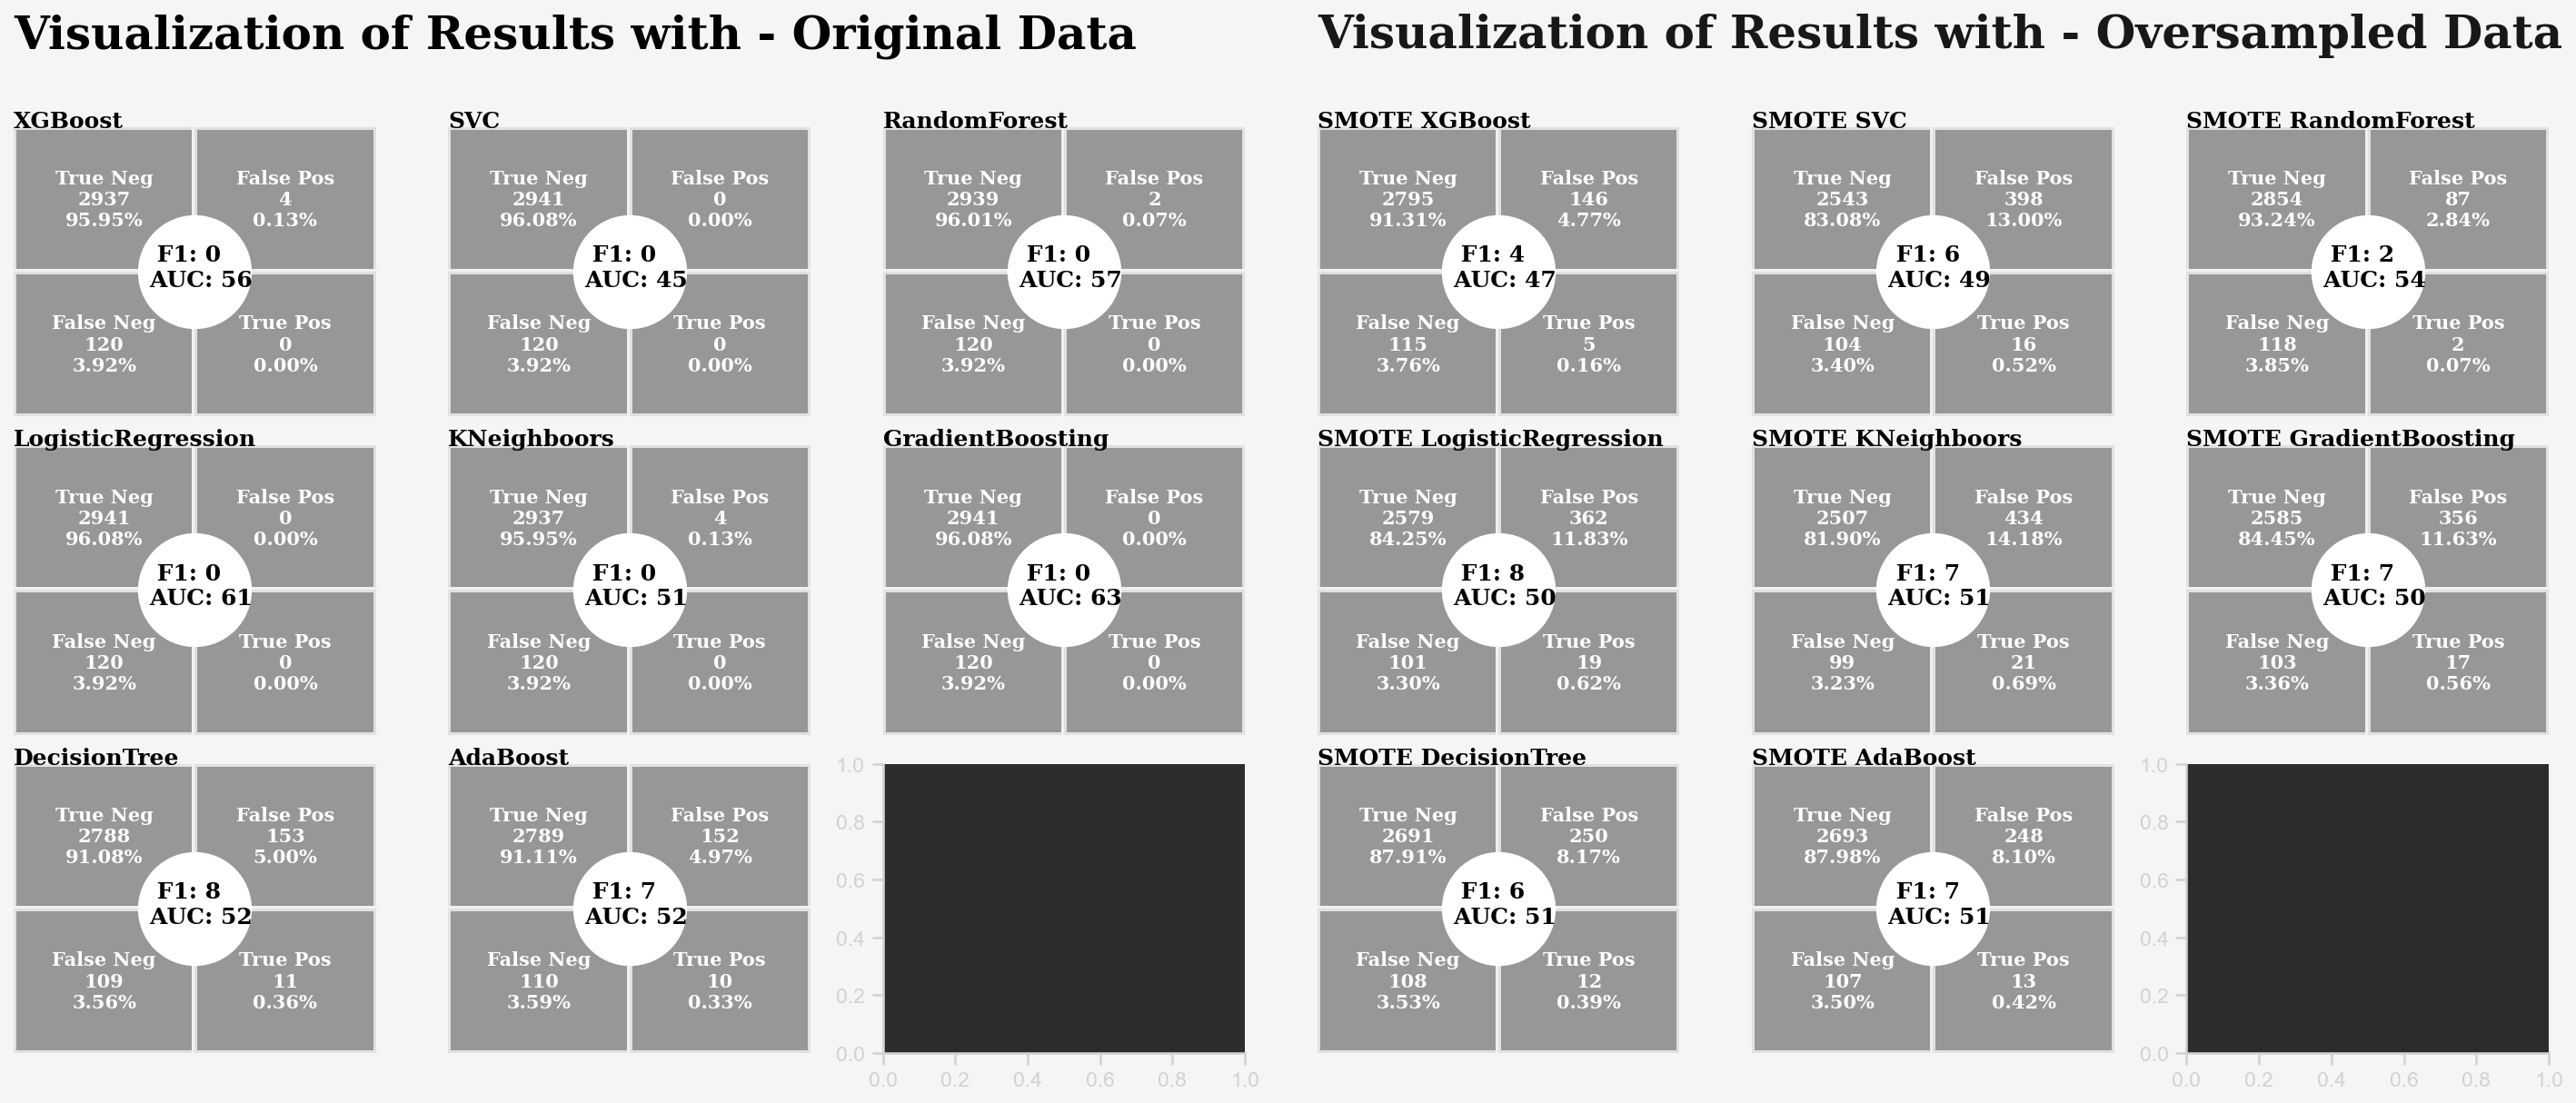

In [120]:
multi_visualize(data = [orig_results, resamp_results], vmin=30,vmax = 100)

<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>5. Conclusion</b>
        </p>
</div>

The results are not good, maybe try to apply K-fold cross validation and gridsearch to get better results. 